# Milestones 2

# 1. Introduction 

**Name**    : Devi Nirfana Hermawan<br>
**Batch**   : HCK-016

**Objective**:<br>
The goal of this project is to construct a machine learning model that predicts fraudulent activities. We'll explore five different classification models: K-Nearest Neighbor (KNN), Support Vector Machine (SVM), Decision Tree, Random Forest, and the boosting algorithm XGBClassifier. Each model will be carefully evaluated using cross-validation and performance metrics such as the F1 score. After identifying the best base model, we'll fine-tune its parameters to improve its accuracy. Finally, we'll compare the tuned model with the base one to choose the best option for predicting fraudulent activities accurately and reliably.

**Dataset Information**: <br>
This project utilizes a raw dataset sourced from kaggle.com titled *"Fraud Detection Dynamics: Financial Transaction"* uploaded by Rohit Sharma. The dataset provides comprehensive information about transactions, with a particular focus on identifying fraudulent activities. With over 6 million entries, it offers a rich and diverse collection of transactional data for analysis and modeling. For access to the dataset source, you can click [here](https://www.kaggle.com/datasets/rohit265/fraud-detection-dynamics-financial-transaction/data) or [download here](https://drive.google.com/file/d/1RwXs7S4xVicwS_KPvnO1KNR4bQLH2kpq/view?usp=sharing).

**Dataset Description Table**:

| **Column Names** | **Description** |
| --- | --- |
| `step` | Represents a unit of time in the transaction process, though the specific time unit is not specified in the dataset. It could denote hours, days, or another unit, depending on the context. |
| `type` | Describes the type of transaction, such as transfer, payment, etc. This categorical variable allows for the classification of different transaction behaviors. |
| `amount` | Indicates the monetary value of the transaction, providing insight into the financial magnitude of each transaction. |
| `nameOrig` | Serves as the identifier for the origin account or entity initiating the transaction. This helps trace the source of funds in each transaction. |
| `oldbalanceOrg` | Represents the balance in the origin account before the transaction occurred, offering a reference point for understanding changes in account balances. |
| `newbalanceOrig` | Reflects the balance in the origin account after the transaction has been processed, providing insight into how the transaction affects the account balance. |
| `nameDest` | Functions as the identifier for the destination account or entity receiving the funds in each transaction. It helps track where the money is being transferred to. |
| `oldbalanceDest` | Indicates the balance in the destination account before the transaction, offering a baseline for assessing changes in account balances due to incoming funds. |
| `newbalanceDest` | Represents the balance in the destination account after the transaction has been completed, providing insight into the impact of incoming funds on the account balance. |
| `isFraud` | A binary indicator (0 or 1) denoting whether the transaction is fraudulent (1) or legitimate (0). This is the target variable for fraud detection modeling. |
| `isFlaggedFraud` | Another binary indicator (0 or 1) which may signal whether a transaction has been flagged as potentially fraudulent. This could serve as an additional feature for fraud detection algorithms. |

# 2. Import Library

In [1]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Feature Engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import kendalltau, spearmanr
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# For Model Definition & Training
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# For Model Evaluation
from sklearn.metrics import make_scorer, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score


# For Saving Models
import pickle

# To Deactivate Warnings
import warnings
warnings.filterwarnings('ignore')

# Displaying all columns
pd.options.display.max_columns = 200

# **3. Data Loading**

## Loading The Data & Extract General Dataset Information

In [2]:
# Loading csv data
df_raw = pd.read_csv('Transactions Data.csv')

In [3]:
# Show First 5 Row of Data
df_raw.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Identifying Target Column
df_raw.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
# Checking Data Summary 
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


**Checking Data Summary - Explanation**

By utilizing the `.info()` method, we gain small summary of the dataset, including the number of rows and columns, as well as the data types of each column. Here's a summary of the key observations extracted from the output:

- The dataset comprises 6362620 entries (rows) and 11 columns.
- Among the columns, 5 have float64 data type, while 3 columns are of the int64 data type, with 3 columns containing object data types.
- The entire dataset consumes approximately 534.0+ MB of memory. Quite big, but it is as expected because dataset have a large amount of data
- After closer examination, I have confirmed that each column has the right data type. 

## Check Data Duplicates

In [6]:
# Check Data Duplicates
df_raw.duplicated().sum()

0

## Check Missing Values

In [7]:
# Checking missing values
df_raw.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Duplicating Raw Data

In [8]:
# Duplicating Raw Data 
df = df_raw.copy()

# 4. Exploratory Data Analysis

## Numerical columns overview

In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Data Cardinality

In [10]:
# Create Column Cardinality Checking Function
def check_column_cardinality(dataframe):
    '''
    This function checks the unique values and checking cardinality status in each column of a given dataset
    
    INPUT: dataframe - the dataset to analyze
    OUTPUT: a table containing columns, the number of unique values in each column, 
            a list of unique values for each column
            the status of cardinality
    '''   
    column_names = list(dataframe.columns)
    unique_counts = []
    unique_values = []
    cardinality_status = []
    
    for column in column_names:
        unique_count = len(dataframe[column].unique())
        unique_counts.append(unique_count)        
        unique_values.append(sorted(dataframe[column].unique().tolist()))
        
        if unique_count > 10:
            cardinality_status.append("high")
        else:
            cardinality_status.append("low")
        
    data = {'column_names': column_names, 
            'total_unique_counts': unique_counts,
            'unique_values': unique_values,
            'cardinality_status': cardinality_status}
    
    print('Columns Cardinality Checking Table')
    display(pd.DataFrame(data=data))

In [11]:
# Using Function to Check Columns Cardinality 
check_column_cardinality(df)

Columns Cardinality Checking Table


,column_names,total_unique_counts,unique_values,cardinality_status
0,step,743,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",high
1,type,5,"[CASH_IN, CASH_OUT, DEBIT, PAYMENT, TRANSFER]",low
2,amount,5316900,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.06, 0.07, 0.09...",high
3,nameOrig,6353307,"[C1000000639, C1000001337, C1000001725, C10000...",high
4,oldbalanceOrg,1845844,"[0.0, 0.05, 0.18, 0.21, 0.44, 0.67, 1.0, 1.02,...",high
5,newbalanceOrig,2682586,"[0.0, 0.01, 0.03, 0.05, 0.12, 0.13, 0.18, 0.21...",high
6,nameDest,2722362,"[C1000004082, C1000004940, C1000013769, C10000...",high
7,oldbalanceDest,3614697,"[0.0, 0.01, 0.03, 0.13, 0.33, 0.37, 0.79, 1.0,...",high
8,newbalanceDest,3555499,"[0.0, 0.01, 0.33, 1.39, 1.64, 1.74, 2.15, 2.45...",high
9,isFraud,2,"[0, 1]",low


## Univariate Analysis

### Transaction Type Distribution

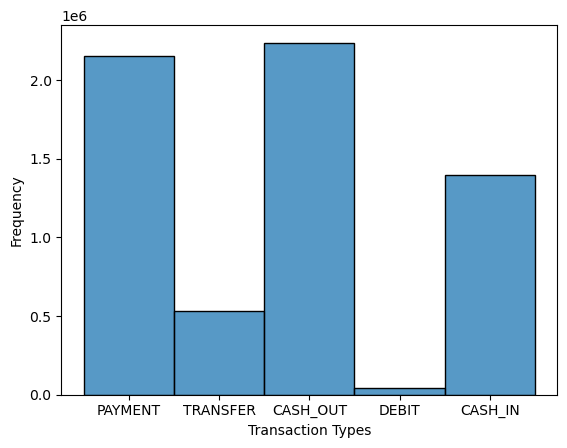

In [12]:
# Plotting the distribution
sns.histplot(df['type'], bins=20)
plt.xlabel('Transaction Types')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Summary
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

The bar plot provided shows the frequency of different transaction types in the dataset.<br>
`PAYMENT` and `CASH_OUT` are the most frequent transaction types, followed by `CASH_IN`, with `TRANSFER` and `DEBIT` being less common. This distribution suggests that the dataset predominantly consists of `PAYMENT` and `CASH_OUT` transactions.

### Amount Distributions

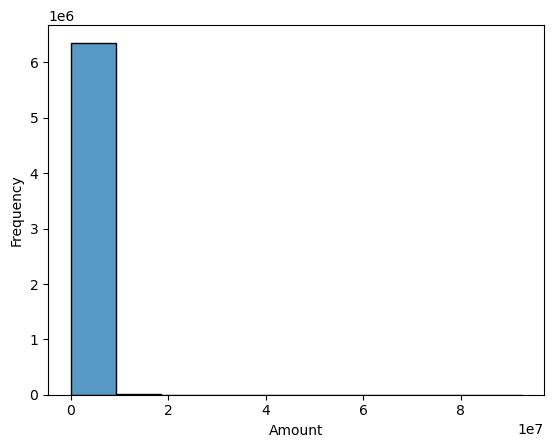

In [14]:
# Plotting the distribution
sns.histplot(df['amount'], bins=10)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Summary
df['amount'].describe().reset_index()

,index,amount
0,count,6.362620e+06
1,mean,1.798619e+05
2,std,6.038582e+05
3,min,0.000000e+00
4,25%,1.338957e+04
5,50%,7.487194e+04
6,75%,2.087215e+05
7,max,9.244552e+07


The provided data describes a distribution of amounts with a large number of entries. The histogram indicates that most of the data points are concentrated at lower amounts, with a significant right skew. 

Key statistics include a count of `approximately 6.36 million entries`. The `mean amount is about 179,862`, with a `standard deviation of 603,858`, indicating a wide spread in the data. The `minimum value is 0`, and the `maximum value is 92,445,520`. The `first quartile (25th percentile) is 13,390`, the m`edian (50th percentile) is 74,872`, and the `third quartile (75th percentile) is 208,721`.

### oldbalanceOrg Distribution 

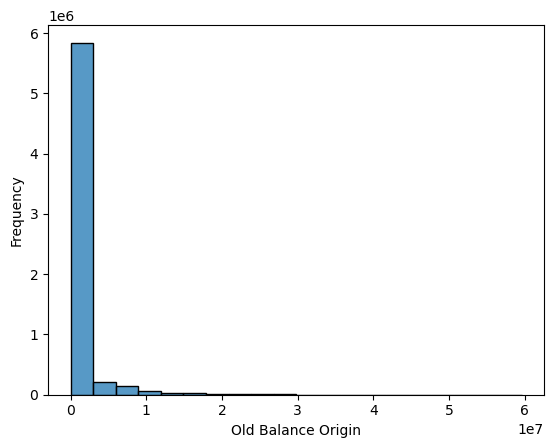

In [16]:
# Plotting the distribution
sns.histplot(df['oldbalanceOrg'], bins=20)
plt.xlabel('Old Balance Origin')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Summary
df['oldbalanceOrg'].describe().reset_index()

,index,oldbalanceOrg
0,count,6.362620e+06
1,mean,8.338831e+05
2,std,2.888243e+06
3,min,0.000000e+00
4,25%,0.000000e+00
5,50%,1.420800e+04
6,75%,1.073152e+05
7,max,5.958504e+07


The provided data describes the distribution of Old Balance Origin amounts. The histogram shows that the majority of the data points are concentrated at lower values, with a significant right skew. 

Key statistics include a count of approximately 6.36 million entries. The `mean balance is about 833,883`, with a `standard deviation of 2,888,243`, indicating a wide variation in the data. The `minimum value is 0`, and the `maximum value is 59,585,040`. The `first quartile (25th percentile) is 0`, the `median (50th percentile) is 14,208`, and the `third quartile (75th percentile) is 107,315`.

### newbalanceOrig Distribution

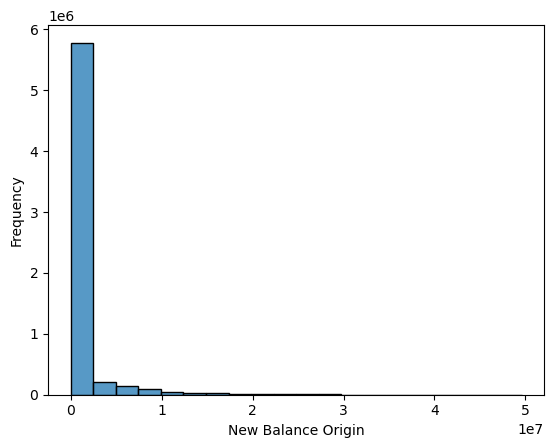

In [18]:
# Plotting the distribution
sns.histplot(df['newbalanceOrig'], bins=20)
plt.xlabel('New Balance Origin')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Summary
df['newbalanceOrig'].describe().reset_index()

,index,newbalanceOrig
0,count,6.362620e+06
1,mean,8.551137e+05
2,std,2.924049e+06
3,min,0.000000e+00
4,25%,0.000000e+00
5,50%,0.000000e+00
6,75%,1.442584e+05
7,max,4.958504e+07


The provided data describes the distribution of New Balance Origin amounts. The histogram shows a strong concentration of data points at lower values, indicating a significant right skew. 

Key statistics include a count of approximately 6.36 million entries. The `mean balance is about 855,114`, with a `standard deviation of 2,924,049`, reflecting a wide range of values. The `minimum value is 0`, and the `maximum value is 49,585,040`. The `first quartile (25th percentile) is 0`, the `median (50th percentile) is also 0`, and the `third quartile (75th percentile) is 144,258`. This indicates that a large portion of the data points have a new balance origin of 0.

### oldbalanceDest Distribution

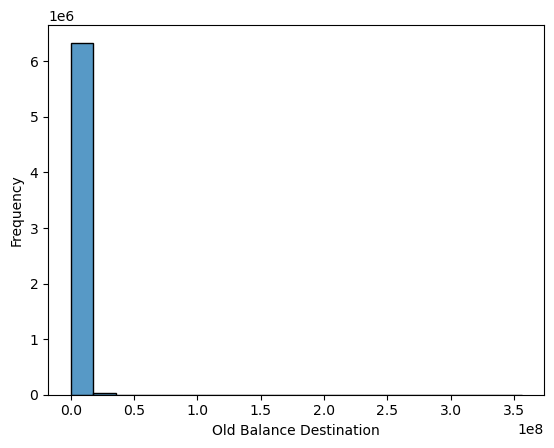

In [20]:
# Plotting the distribution
sns.histplot(df['oldbalanceDest'], bins=20)
plt.xlabel('Old Balance Destination')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Summary
df['oldbalanceDest'].describe().reset_index()

,index,oldbalanceDest
0,count,6.362620e+06
1,mean,1.100702e+06
2,std,3.399180e+06
3,min,0.000000e+00
4,25%,0.000000e+00
5,50%,1.327057e+05
6,75%,9.430367e+05
7,max,3.560159e+08


The histogram and accompanying statistics summarize the distribution of the Old Balance Destination variable. 

The data consists of 6,362,620 observations. The `mean value of the old balance destination is approximately 1,100,702`, with a `standard deviation of about 3,399,180`, indicating significant variability. Most of the data is clustered around lower values, as evidenced by the `25th and 50th percentiles being 0 and 132,705.7 respectively`. The `maximum value observed is 356,015,900`, which is much higher than the mean, suggesting the presence of some extremely high values that skew the distribution. This skewness is also visually evident in the histogram, where the majority of frequencies are concentrated near zero.

### newbalanceDest Distribution 

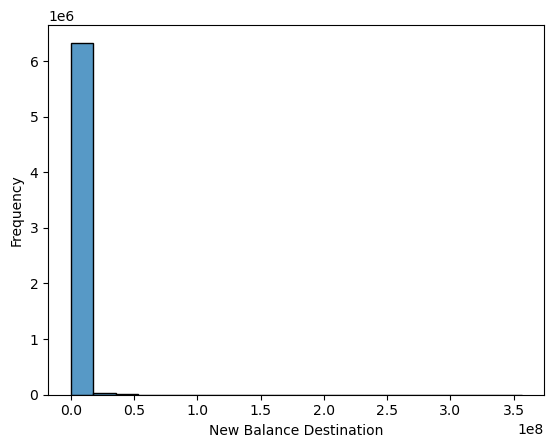

In [22]:
# Plotting the distribution
sns.histplot(df['newbalanceDest'], bins=20)
plt.xlabel('New Balance Destination')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Summary
df['newbalanceDest'].describe().reset_index()

,index,newbalanceDest
0,count,6.362620e+06
1,mean,1.224996e+06
2,std,3.674129e+06
3,min,0.000000e+00
4,25%,0.000000e+00
5,50%,2.146614e+05
6,75%,1.111909e+06
7,max,3.561793e+08


The histogram and accompanying statistics provide an overview of the New Balance Destination variable. The dataset comprises 6,362,620 entries. 

The `mean value of the new balance destination is approximately 1,224,996`, with a `standard deviation of about 3,674,129`, indicating substantial variability. Similar to the old balance destination, most of the data is concentrated around lower values, as shown by the `25th and 50th percentiles being 0 and 214,661.4 respectively`. The `maximum observed value is 356,179,300`, which significantly exceeds the mean, indicating the presence of extremely high values that create a skewed distribution. This skewness is evident in the histogram, where the majority of frequencies are heavily concentrated near zero.

### isFlaggedFraud Distribution

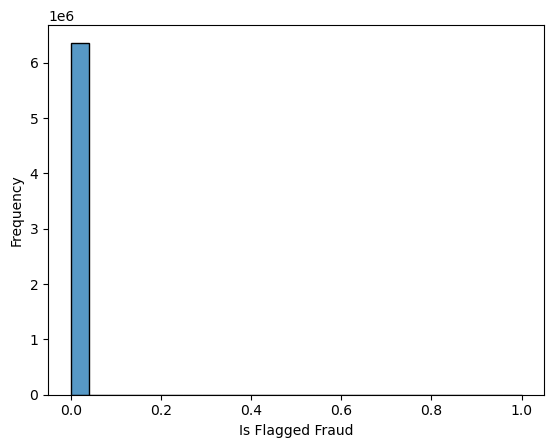

In [24]:
# Plotting the distribution
sns.histplot(df['isFlaggedFraud'])
plt.xlabel('Is Flagged Fraud')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Summary
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

The histogram and accompanying data provide an overview of the Is Flagged Fraud variable. The dataset includes 6,362,620 observations. 

Among these, `only 16 transactions are flagged as fraudulent`, while the `remaining 6,362,604 transactions are not flagged`. This indicates that fraudulent transactions are extremely rare in this dataset. The histogram visually reflects this extreme imbalance, with the vast majority of frequencies concentrated at zero, indicating non-fraudulent transactions.

### isFraud Distribution

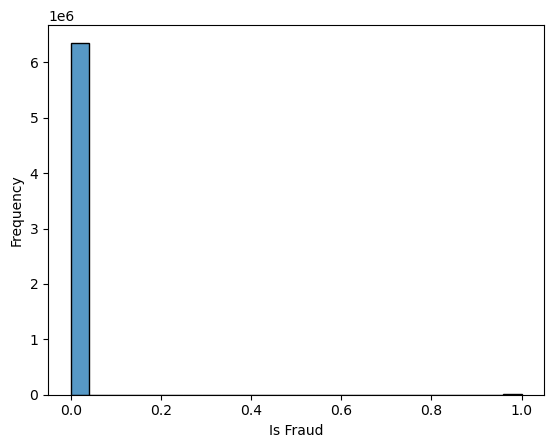

In [26]:
# Plotting the distribution
sns.histplot(df['isFraud'])
plt.xlabel('Is Fraud')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Summary
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

The histogram and accompanying data provide insights into the "Is Fraud" variable. The dataset consists of 6,362,620 transactions. 

Out of these, `8,213 transactions are identified as fraudulent`, while the `remaining 6,354,407 transactions are not fraudulent`. This indicates that fraudulent transactions are relatively rare compared to non-fraudulent ones. The histogram clearly shows this imbalance, with the majority of frequencies clustered at zero, representing non-fraudulent transactions. The relatively small number of fraudulent transactions is visually represented by a minor spike at one.

## Bivariate Analysis

### Transaction Types vs Amount Balance

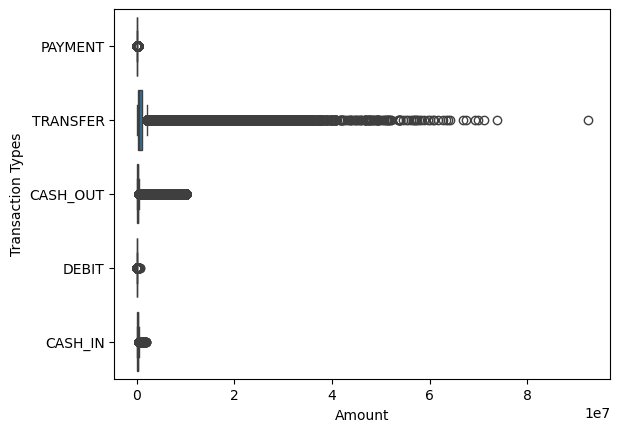

In [28]:
# Plotting the distribution per transaction type
sns.boxplot(x=df['amount'], y=df['type'])
plt.xlabel('Amount')
plt.ylabel('Transaction Types')
plt.show()

In [29]:
# Summary
df.groupby('type')['amount'].describe().T

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
count,1.399284e+06,2.237500e+06,41432.000000,2.151495e+06,5.329090e+05
mean,1.689202e+05,1.762740e+05,5483.665314,1.305760e+04,9.106470e+05
std,1.265083e+05,1.753297e+05,13318.535518,1.255645e+04,1.879574e+06
min,4.000000e-02,0.000000e+00,0.550000,2.000000e-02,2.600000e+00
25%,7.051018e+04,7.266965e+04,1500.180000,4.383820e+03,2.159054e+05
50%,1.434277e+05,1.470722e+05,3048.990000,9.482190e+03,4.863084e+05
75%,2.398991e+05,2.465395e+05,5479.175000,1.756122e+04,9.749580e+05
max,1.915268e+06,1.000000e+07,569077.510000,2.386380e+05,9.244552e+07


The box plot and summary statistics provide an overview of the Old Balance Origin across different transaction types: `CASH_IN`, `CASH_OUT`, `DEBIT`, `PAYMENT`, and `TRANSFER`. The dataset includes `1,399,284 CASH_IN transactions`, `2,237,500 CASH_OUT transactions`, `41,432 DEBIT transactions`, `2,151,495 PAYMENT transactions`, and `532,909 TRANSFER transactions`.
- `CASH_IN`: The mean old balance origin is approximately 168,920, with a standard deviation of about 126,508. The maximum value is 1,915,268.
- `CASH_OUT`: The mean old balance origin is approximately 176,274, with a standard deviation of about 175,330. The maximum value is 10,000,000.
- `DEBIT`: The mean old balance origin is approximately 5,484, with a standard deviation of about 13,319. The maximum value is 569,077.51.
- `PAYMENT`: The mean old balance origin is approximately 13,058, with a standard deviation of about 12,556. The maximum value is 238,638.
- `TRANSFER`: The mean old balance origin is approximately 910,647, with a standard deviation of about 1,879,574. The maximum value is 92,445,520.

The box plot shows that most transaction types have balances clustered towards lower values, with `TRANSFER` transactions showing a wider range of values and significant outliers.

### Transaction Types vs Old Balance Origin

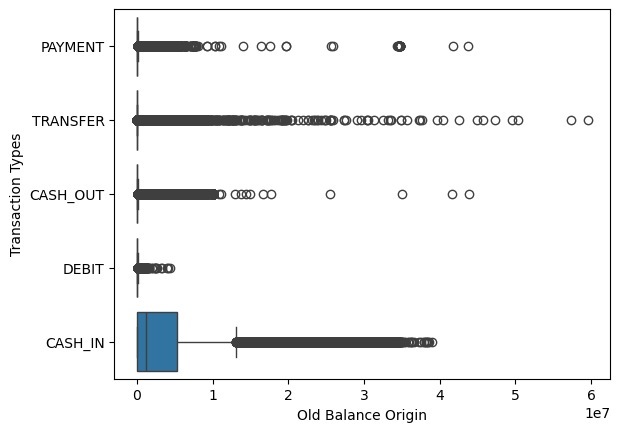

In [30]:
# Plotting the distribution per transaction type
sns.boxplot(x=df['oldbalanceOrg'], y=df['type'])
plt.xlabel('Old Balance Origin')
plt.ylabel('Transaction Types')
plt.show()

In [31]:
# Summary
df.groupby('type')['oldbalanceOrg'].describe().T

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
count,1.399284e+06,2.237500e+06,4.143200e+04,2.151495e+06,5.329090e+05
mean,3.590464e+06,4.602380e+04,6.864734e+04,6.821683e+04,5.444185e+04
std,5.291825e+06,1.791326e+05,1.384493e+05,1.989911e+05,4.399818e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.776800e+04,0.000000e+00,1.518500e+03,0.000000e+00,0.000000e+00
50%,1.200093e+06,5.560000e+02,2.082111e+04,1.053000e+04,0.000000e+00
75%,5.284255e+06,3.144624e+04,6.880661e+04,6.088300e+04,2.626600e+04
max,3.893942e+07,4.381886e+07,4.362014e+06,4.368662e+07,5.958504e+07


The box plot and summary statistics provide insights into the Old Balance Origin across various transaction types: `CASH_IN`, `CASH_OUT`, `DEBIT`, `PAYMENT`, and `TRANSFER`. The dataset includes the following number of transactions: `1,399,284 for CASH_IN`, `2,237,500 for CASH_OUT`, `41,432 for DEBIT`, `2,151,495 for PAYMENT`, and `532,909 for TRANSFER`.

- `CASH_IN`: The mean old balance origin is approximately 3,590,464, with a standard deviation of about 5,291,825. The maximum value is 38,939,420.
- `CASH_OUT`: The mean old balance origin is approximately 46,024, with a standard deviation of about 179,132.6. The maximum value is 43,818,860.
- `DEBIT`: The mean old balance origin is approximately 68,647.34, with a standard deviation of about 138,449.3. The maximum value is 4,362,014.
- `PAYMENT`: The mean old balance origin is approximately 68,216.83, with a standard deviation of about 198,991.1. The maximum value is 43,686,620.
- `TRANSFER`: The mean old balance origin is approximately 54,441.85, with a standard deviation of about 439,981.8. The maximum value is 59,585,040.

The box plot shows that most transaction types have balances clustered toward lower values, with `CASH_IN` transactions showing a broader range and a significant number of high-value outliers. `TRANSFER` and `CASH_OUT` transactions also exhibit notable outliers, while `PAYMENT` and `DEBIT` transactions have a narrower range of values.

### Transaction Types vs New Balance Origin

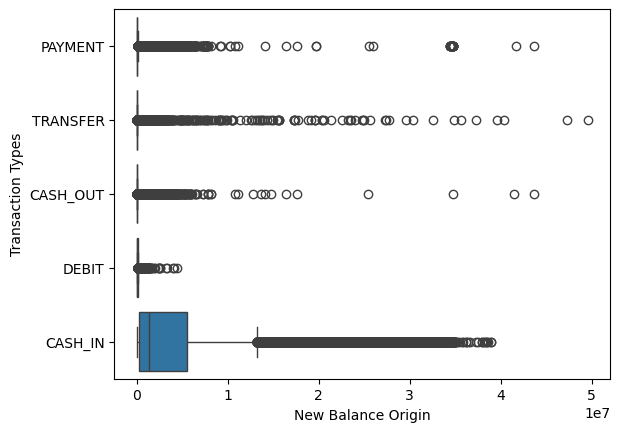

In [32]:
# Plotting the distribution per transaction type
sns.boxplot(x=df['newbalanceOrig'], y=df['type'])
plt.xlabel('New Balance Origin')
plt.ylabel('Transaction Types')
plt.show()

In [33]:
# Summary
df.groupby('type')['newbalanceOrig'].describe().T

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
count,1.399284e+06,2.237500e+06,4.143200e+04,2.151495e+06,5.329090e+05
mean,3.759379e+06,1.747419e+04,6.516165e+04,6.183789e+04,1.028816e+04
std,5.287487e+06,1.091940e+05,1.376566e+05,1.969915e+05,2.623603e+05
min,5.440000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.497569e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.369115e+06,0.000000e+00,1.663242e+04,0.000000e+00,0.000000e+00
75%,5.450491e+06,0.000000e+00,6.263080e+04,4.965413e+04,0.000000e+00
max,3.894623e+07,4.368662e+07,4.359375e+06,4.367380e+07,4.958504e+07


The box plot and summary statistics provide an overview of the "New Balance Origin" across different transaction types: `CASH_IN`, `CASH_OUT`, `DEBIT`, `PAYMENT`, and `TRANSFER`. The dataset includes the following number of transactions: `1,399,284 for CASH_IN`, `2,237,500 for CASH_OUT`, `41,432 for DEBIT`, `2,151,495 for PAYMENT`, and `532,909 for TRANSFER`.

- `CASH_IN`: The mean new balance origin is approximately 3,759,379, with a standard deviation of about 5,287,487. The maximum value is 38,946,230.
- `CASH_OUT`: The mean new balance origin is approximately 17,474.19, with a standard deviation of about 109,194. The maximum value is 43,686,620.
- `DEBIT`: The mean new balance origin is approximately 65,161.65, with a standard deviation of about 137,656.6. The maximum value is 4,359,375.
- `PAYMENT`: The mean new balance origin is approximately 61,837.89, with a standard deviation of about 196,991.5. The maximum value is 43,673,800.
- `TRANSFER`: The mean new balance origin is approximately 10,288.16, with a standard deviation of about 262,360.3. The maximum value is 49,585,040.

The box plot shows that most transaction types have balances clustered toward lower values, with `CASH_IN` transactions showing a broader range and a significant number of high-value outliers. `TRANSFER` and `CASH_OUT` transactions also exhibit notable outliers, while `PAYMENT` and `DEBIT` transactions have a narrower range of values.

### Transaction Types vs Old Balance Destination

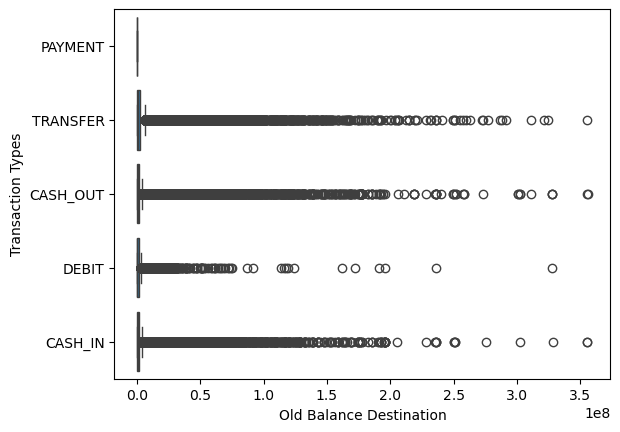

In [34]:
# Plotting the distribution per transaction type
sns.boxplot(x=df['oldbalanceDest'], y=df['type'])
plt.xlabel('Old Balance Destination')
plt.ylabel('Transaction Types')
plt.show()

In [35]:
# Summary 
df.groupby('type')['oldbalanceDest'].describe().T

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
count,1.399284e+06,2.237500e+06,4.143200e+04,2151495.0,5.329090e+05
mean,1.587919e+06,1.497758e+06,1.493136e+06,0.0,2.567606e+06
std,3.713923e+06,3.633876e+06,4.386970e+06,0.0,6.037846e+06
min,0.000000e+00,0.000000e+00,8.500000e+01,0.0,0.000000e+00
25%,1.612608e+05,1.146859e+05,1.300251e+05,0.0,2.249354e+05
50%,5.471373e+05,4.880985e+05,4.244604e+05,0.0,1.015903e+06
75%,1.619594e+06,1.510450e+06,1.372975e+06,0.0,2.753798e+06
max,3.555534e+08,3.560159e+08,3.278278e+08,0.0,3.553805e+08


The box plot and summary statistics provide an overview of the Old Balance Destination across different transaction types: `CASH_IN`, `CASH_OUT`, `DEBIT`, `PAYMENT`, and `TRANSFER`. The dataset includes the following number of transactions: `1,399,284 for CASH_IN`, `2,237,500 for CASH_OUT`, `41,432 for DEBIT`, `2,151,495 for PAYMENT`, and `532,909 for TRANSFER`.

- `CASH_IN`: The mean new balance origin is approximately 1,587,919, with a standard deviation of about 3,713,923. The maximum value is 355,553,400.
- `CASH_OUT`: The mean new balance origin is approximately 1,497,758, with a standard deviation of about 3,633,876. The maximum value is 356,015,900.
- `DEBIT`: The mean new balance origin is approximately 1,493,136, with a standard deviation of about 4,386,970. The maximum value is 327,827,800.
- `PAYMENT`: The mean new balance origin is 0, as all payments seem to have a zero new balance.
- `TRANSFER`: The mean new balance origin is approximately 2,567,606, with a standard deviation of about 6,037,846. The maximum value is 355,380,500.

The box plot shows that most transaction types have balances clustered toward lower values, with `TRANSFER` and `CASH_OUT` transactions showing a broader range and significant high-value outliers. `DEBIT` transactions also exhibit notable outliers, while `CASH_IN` transactions have a narrower range of values. `PAYMENTS` consistently have a zero new balance.

### Transaction Types vs New Balance Destination

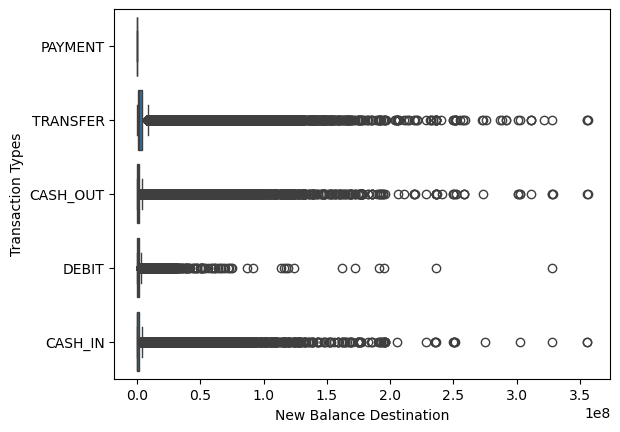

In [36]:
# Plotting the distribution per transaction type
sns.boxplot(x=df['newbalanceDest'], y=df['type'])
plt.xlabel('New Balance Destination')
plt.ylabel('Transaction Types')
plt.show()

In [37]:
# Summary
df.groupby('type')['newbalanceDest'].describe().T

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
count,1.399284e+06,2.237500e+06,4.143200e+04,2151495.0,5.329090e+05
mean,1.467105e+06,1.691326e+06,1.513003e+06,0.0,3.554567e+06
std,3.712985e+06,3.663008e+06,4.395708e+06,0.0,7.387614e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
25%,4.274628e+04,2.858970e+05,1.365075e+05,0.0,7.536934e+05
50%,3.857514e+05,6.876067e+05,4.393289e+05,0.0,1.725375e+06
75%,1.465846e+06,1.741879e+06,1.404072e+06,0.0,3.795986e+06
max,3.553814e+08,3.561793e+08,3.278521e+08,0.0,3.560159e+08


The box plot and summary statistics provide an overview of the New Balance Destination across different transaction types: `CASH_IN`, `CASH_OUT`, `DEBIT`, `PAYMENT`, and `TRANSFER`. The dataset includes the following number of transactions: `1,399,284 for CASH_IN`, `2,237,500 for CASH_OUT`, `41,432 for DEBIT`, `2,151,495 for PAYMENT`, and `532,909 for TRANSFER`.

- `CASH_IN`: The mean new balance destination is approximately 1,467,105, with a standard deviation of about 3,712,985. The maximum value is 355,381,400.
- `CASH_OUT`: The mean new balance destination is approximately 1,691,326, with a standard deviation of about 3,663,008. The maximum value is 356,179,300.
- `DEBIT`: The mean new balance destination is approximately 1,513,003, with a standard deviation of about 4,395,708. The maximum value is 327,852,100.
- `PAYMENT`: The mean new balance destination is 0, as all payments have a zero new balance.
- `TRANSFER`: The mean new balance destination is approximately 3,554,567, with a standard deviation of about 7,387,614. The maximum value is 356,015,900.

The box plot shows that most transaction types have balances clustered toward lower values, with `TRANSFER` and `CASH_OUT` transactions showing a broader range and significant high-value outliers. `DEBIT` transactions also exhibit notable outliers, while `CASH_IN` transactions have a narrower range of values. `PAYMENTS` consistently have a zero new balance.

### Amount Balance vs Old Balance Origin

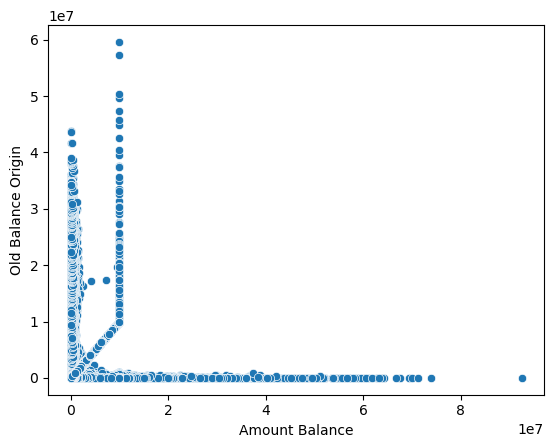

In [38]:
# Plotting the spreading
sns.scatterplot(x=df['amount'], y=df['oldbalanceOrg'])
plt.xlabel('Amount Balance')
plt.ylabel('Old Balance Origin')
plt.show()

The scatter plot displays the relationship between Old Balance Origin and Amount Balance. The data points indicate that most of the transactions cluster around lower values for both balances, forming a dense concentration near the origin (0,0).
- **High Density at Lower Values**: The majority of data points are concentrated on both Old Balance Origin and Amount Balance are close to zero, indicating that most transactions involve smaller amounts.
- **Vertical Distribution**: Some points with a higher Old Balance Origin are spread vertically, but these tend to be associated with smaller Amount Balance values.
- **Horizontal Distribution**: There are also points spread horizontally with higher Amount Balance values, but they typically have low Old Balance Origin values.

### Amount Balance vs New Balance Origin

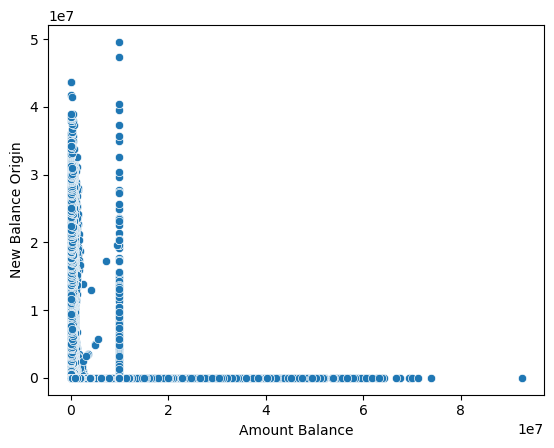

In [39]:
# Plotting the spreading
sns.scatterplot(x=df['amount'], y=df['newbalanceOrig'])
plt.xlabel('Amount Balance')
plt.ylabel('New Balance Origin')
plt.show()


The scatter plot shows the relationship between New Balance Origin and Amount Balance. Similar to the previous plot, the data points highlight how most transactions cluster around lower values for both balances.
- **High Density at Lower Values** The majority of the data points are concentrated on the origin (0,0), indicating that most transactions involve smaller amounts for both New Balance Origin and Amount Balance.
- **Vertical Distribution** There are points with higher New Balance Origin spread vertically, mostly associated with lower Amount Balance values.
- **Horizontal Distribution** Some points with higher Amount Balance values spread horizontally but are typically associated with low New Balance Origin values.

## Multivariate Analysis

### Heatmap of Numerical Variable

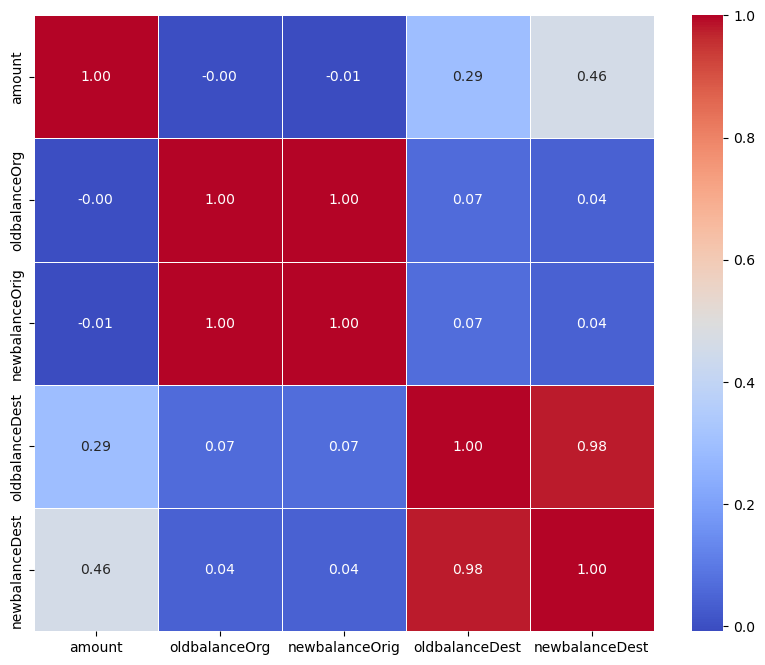

In [40]:
# Correlation matrix
correlation_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.show()

The heatmap provides a visual representation of the correlation matrix for the numeric variables: `amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, and `newbalanceDest`. 
1. **Strong Correlations:**
   - There is a perfect correlation (1.00) between `oldbalanceOrg` and `newbalanceOrig`, indicating that the balance in the origin account before and after the transaction are almost always identical.
   - Similarly, `oldbalanceDest` and `newbalanceDest` have a very high correlation (0.98), showing that the balance in the destination account before and after the transaction is very closely related.

2. **Moderate Correlations:**
   - `amount` shows moderate correlations with `oldbalanceDest` (0.29) and `newbalanceDest` (0.46). This indicates that the transaction amount has a moderate positive relationship with the balances in the destination account.

3. **Weak or No Correlations:**
   - `amount` has very weak or no correlation with `oldbalanceOrg` (-0.00) and `newbalanceOrig` (-0.01), suggesting that the transaction amount is not significantly related to the balances in the origin account.
   - Other correlations, such as between `oldbalanceOrg` and `oldbalanceDest` (0.07), are also weak, indicating minimal linear relationships between these variables.

### Pairplot of Numerical Variable

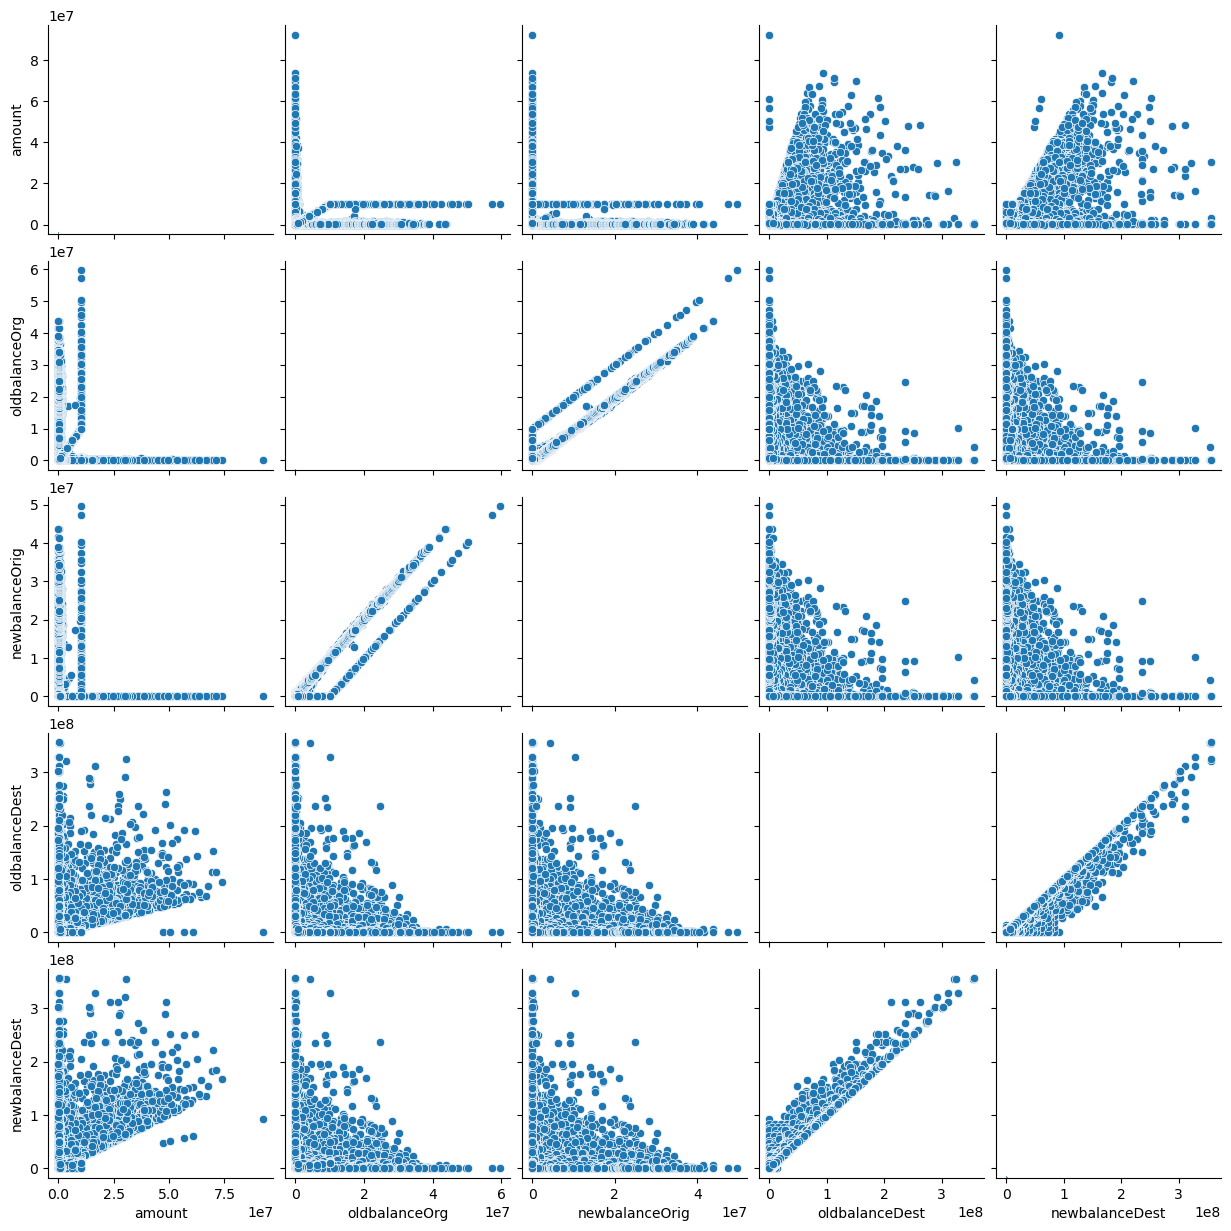

In [41]:
# Plotting the pairplot
sns.pairplot(df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
plt.show()

The pair plot provides a detailed view of the relationships between the numeric variables: `amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, and `newbalanceDest`. 
- **Strong Linear Relationships:** There are clear linear relationships between `oldbalanceOrg` and `newbalanceOrig`, as well as between `oldbalanceDest` and `newbalanceDest`. This indicates that the balance before and after transactions are highly correlated.
- **Clustered Data Points:** Most data points are clustered near the lower end of the scales, especially for `amount` and `balances`, suggesting a high frequency of small-value transactions.
- **Diagonal Lines:** The diagonal subplots show histograms of each variable, reflecting the distribution of individual variables. 
- **Scattered Points:** There are noticeable outliers and scattered points in the relationships between `amount` and the balance variables, indicating some transactions involve significantly higher amounts than the majority.

# 5. Feature Engineering

## Target and Feature Split

In [42]:
# Split between features (X) and Target (y)
X = df.drop(columns=['nameOrig', 'nameDest', 'isFraud'], axis=1)    # X as feature should drop satisfaction(targeted columns)
y = df['isFraud']                                                   # y only consist of target

The codes separate the dataset into two components. `X` which contain all the features except the target variable `nameOrig`, `nameDest`, `isFraud`. `y` which consist solely of the target variable.

## Train and Test Split

In [43]:
# Split between Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    stratify = y,
                                                    random_state = 46)


# Checking the Size of Train and Test
print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (4453834, 8)
X test shape: (1908786, 8)
y train shape: (4453834,)
y test shape: (1908786,)


The data is partitioned into training and test sets to facilitate the model-building process:

- **Training Set (X_train, y_train)**: This subset consists of 4,453,834 samples and 8 features. It is used to train the model on historical data, allowing it to learn patterns and relationships between the features and the target variable.

- **Test Set (X_test, y_test)**: This subset consists of 1,908,786 samples and 8 features. It remains unseen by the model during training and serves as an independent dataset to evaluate the model's performance. By withholding this portion of the data for testing, we can assess how well the model generalizes to new, unseen data.

## Outliers Handling

In [44]:
# Filer Numerical Columns in X train
numeric_columns = X_train.select_dtypes(include=np.number).columns.to_list()

# Skewed columns container
skewed_numeric_data = []
skewed_numeric_columns = []

# Normal distribution columns container
normal_numeric_data = []
normal_numeric_columns = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for column in numeric_columns:
    skewness = X_train[column].skew()
    # If Normal distribution
    if skewness <= 0.5 and skewness >= -0.5:
        normal_numeric_columns.append(column)
        normal_numeric_data.append([column, skewness])
    # If Skewed distribution
    elif skewness < -0.5 or skewness > 0.5:
        skewed_numeric_columns.append(column)
        skewed_numeric_data.append([column, skewness])

The code above identifies the skewness of each numeric column in X_train. If the skewness of the data is `between -0.5 and 0.5, it is considered normally distributed`. If the skewness is `greater than 0.5 or less than -0.5, the data is considered skewed`.

In [45]:
# Showing all columns with normal distribution and each skewness
print('Columns with Normal Distribution')
pd.DataFrame(data=normal_numeric_data, columns=['normal_distributed_columns', 'skewness'])

Columns with Normal Distribution


,normal_distributed_columns,skewness
0,step,0.374341


Only one column, step, has a normal distribution. The outliers in this column will be handled using the Gaussian method with the Winsorizer module.

In [46]:
# Showing all columns with skewed distribution and each skewness
print('Columns with Skewed Distribution')
pd.DataFrame(data=skewed_numeric_data, columns=['skewed_columns', 'skewness'])

Columns with Skewed Distribution


,skewed_columns,skewness
0,amount,30.454357
1,oldbalanceOrg,5.245300
2,newbalanceOrig,5.173391
3,oldbalanceDest,20.564334
4,newbalanceDest,19.919359
5,isFlaggedFraud,636.310673


There are six columns in the data with a skewed distribution. The outliers in these columns will be handled using the IQR method with the Winsorizer module.

### Capping or Censoring Method 

In [47]:
# define low variation columns in normal_distributed_columns
low_var_cols_skewed = ['isFlaggedFraud']

# Drop the low variation columns in skewed columns
for column in low_var_cols_skewed:
    skewed_numeric_columns.remove(column)

To avoid errors and because `ifFlaggedFraud` has binary values, this column will be excluded during the outlier handling process and concatenated back after the outliers have been addressed.

In [48]:
# Capping Method for Normal Distribution  
winsorizer_normal_distribution = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=normal_numeric_columns,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal_distribution.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_normal_distribution.transform(X_test)

Using the code above, outliers are capped with the Gaussian method for columns that are normally distributed. Subsequently, the IQR method will be used to cap outliers in the skewed columns.

In [49]:
# Capping Method for Skewed Distribution  
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=skewed_numeric_columns,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

The code above caps outliers using the IQR method for columns with skewed distributions.

In [50]:
# Appending back low variation columns in skewed columns
for column in low_var_cols_skewed:
    skewed_numeric_columns.append(column)

In [51]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot
    
    Example: 
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='orange', kde=True)
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='orange', kde=True)
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


The function above visualizes the data before and after capping outliers using the selected method. It displays both the histogram and the box plot for each numerical feature.

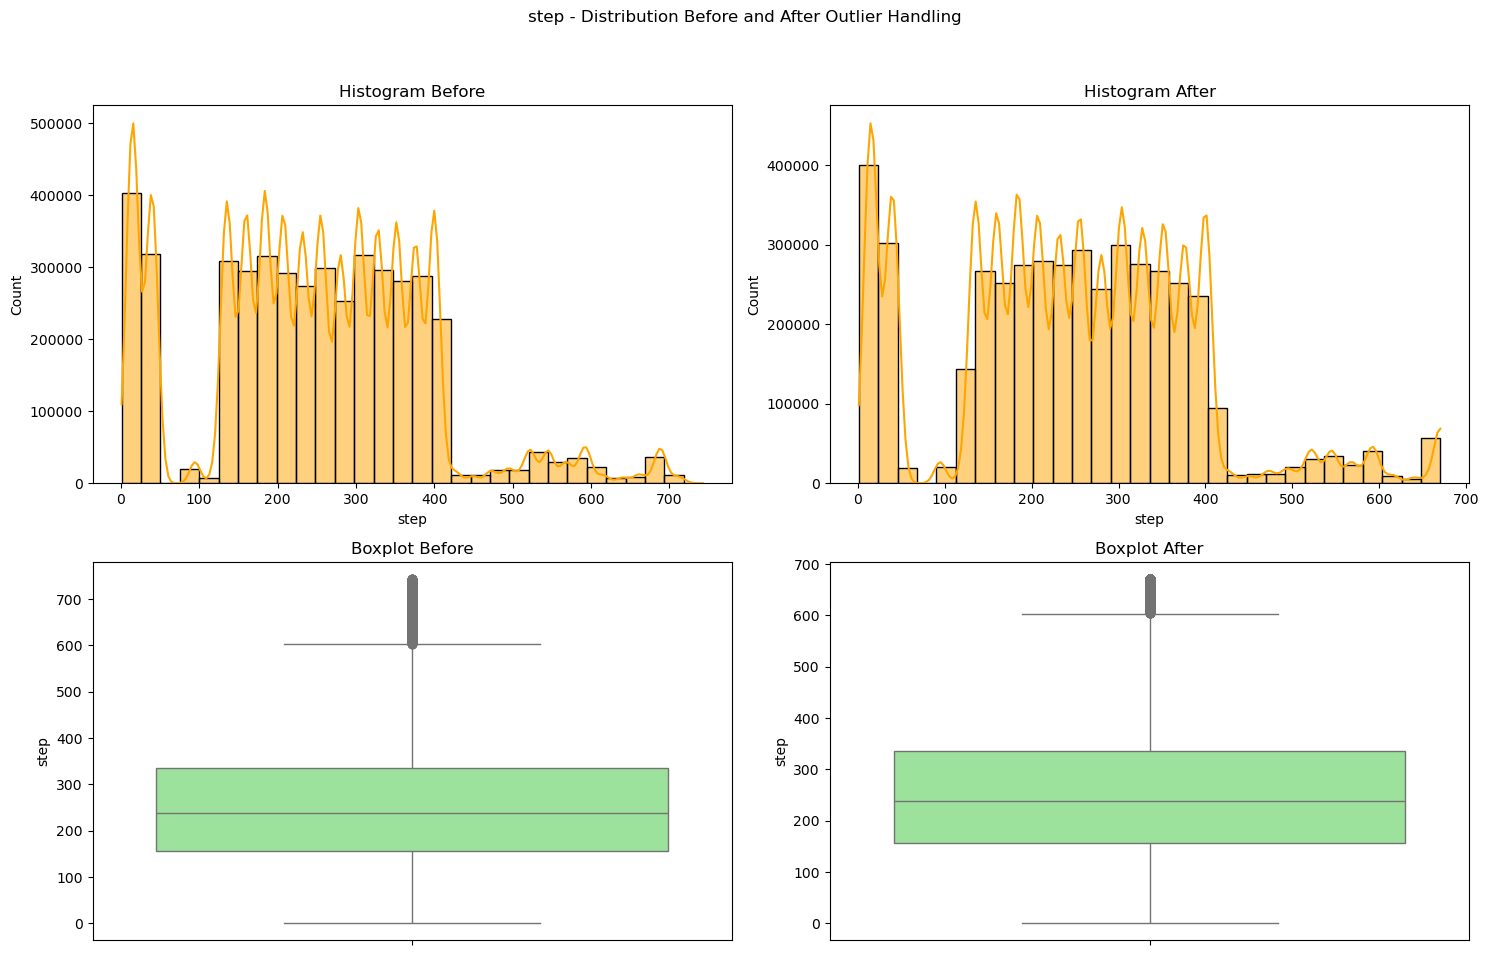

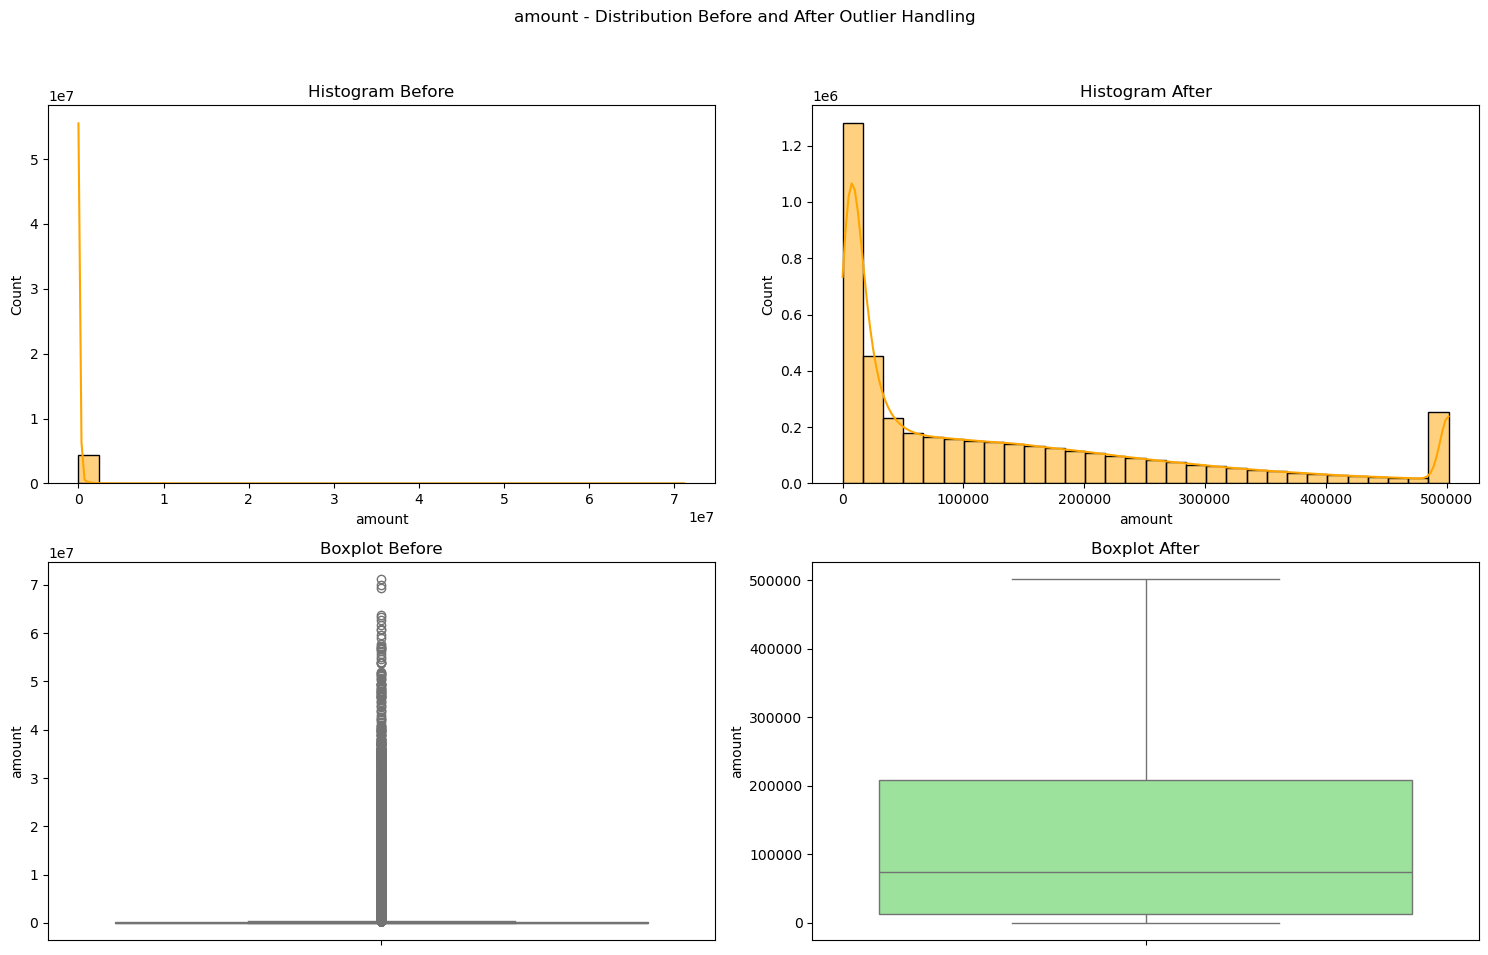

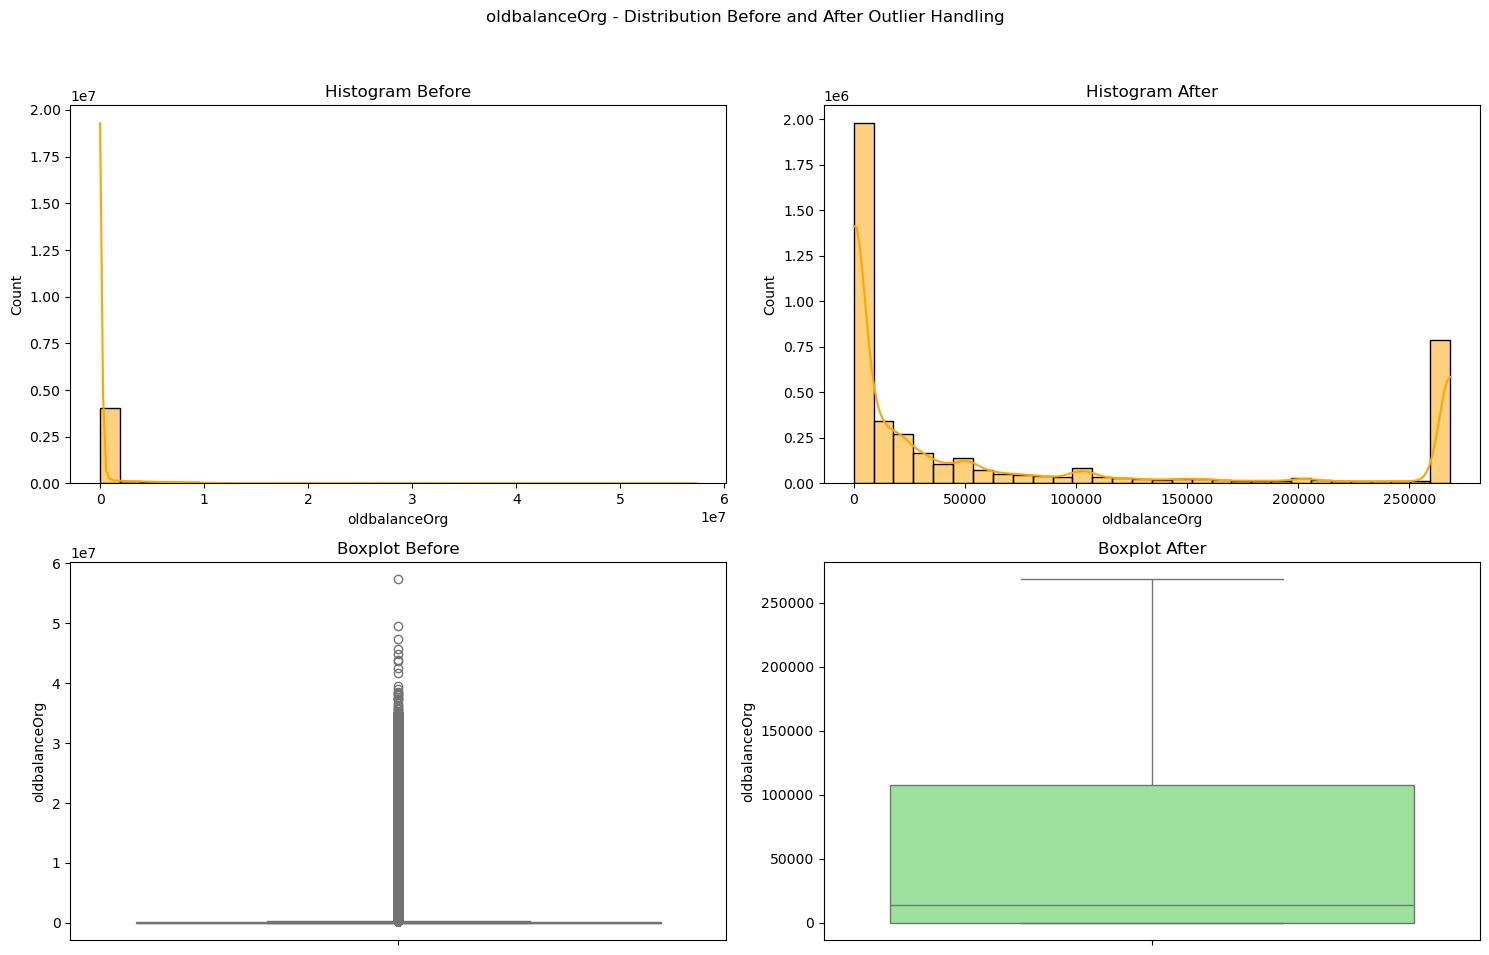

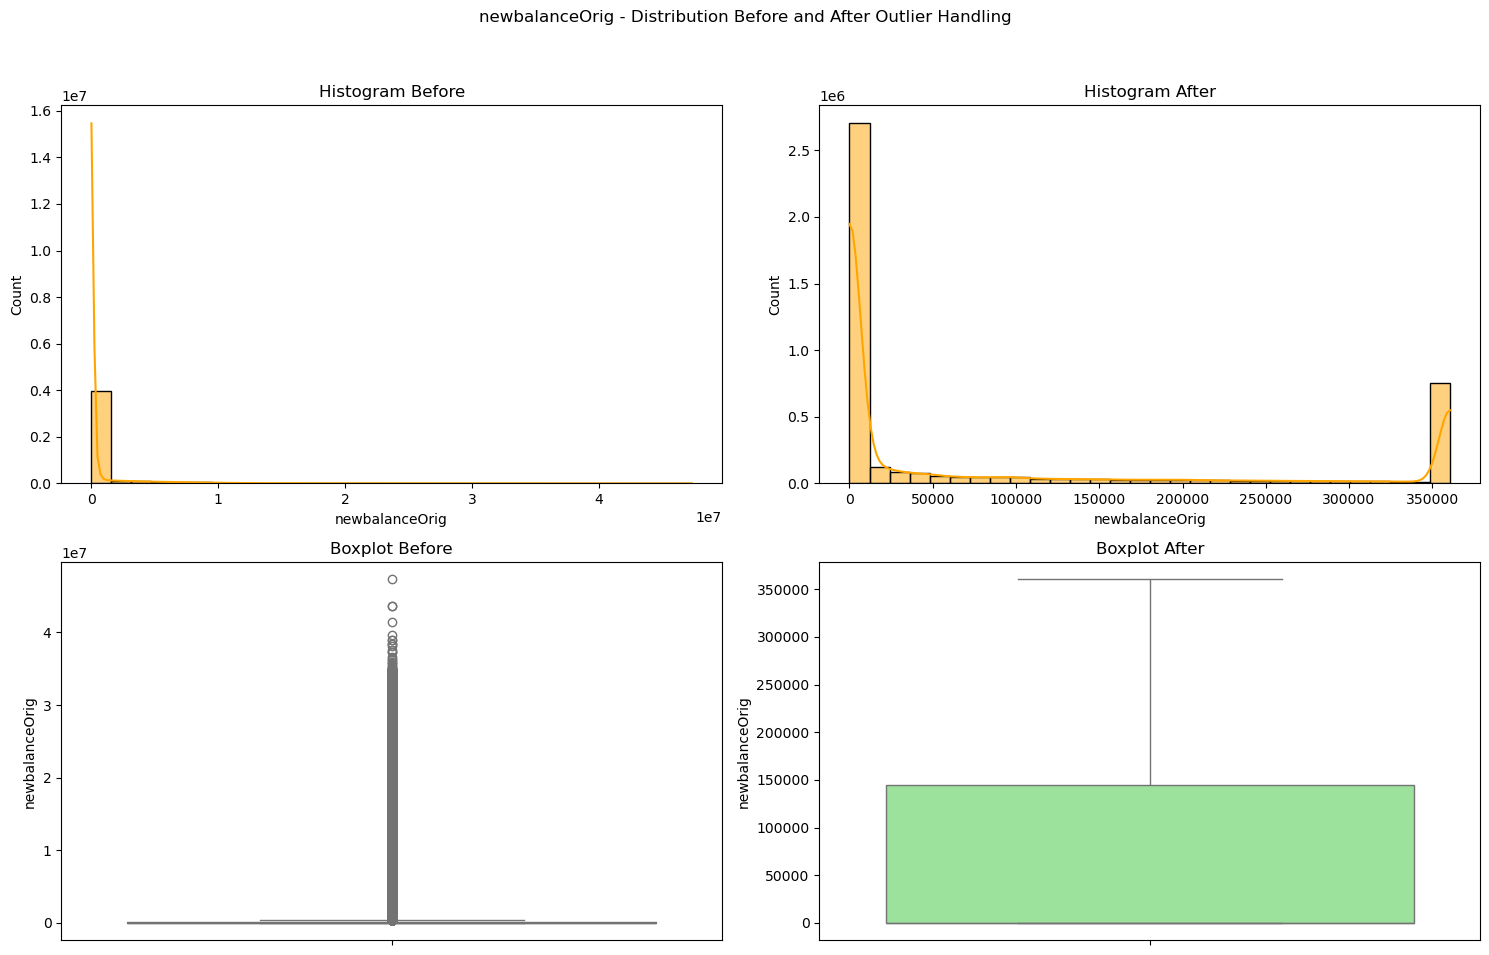

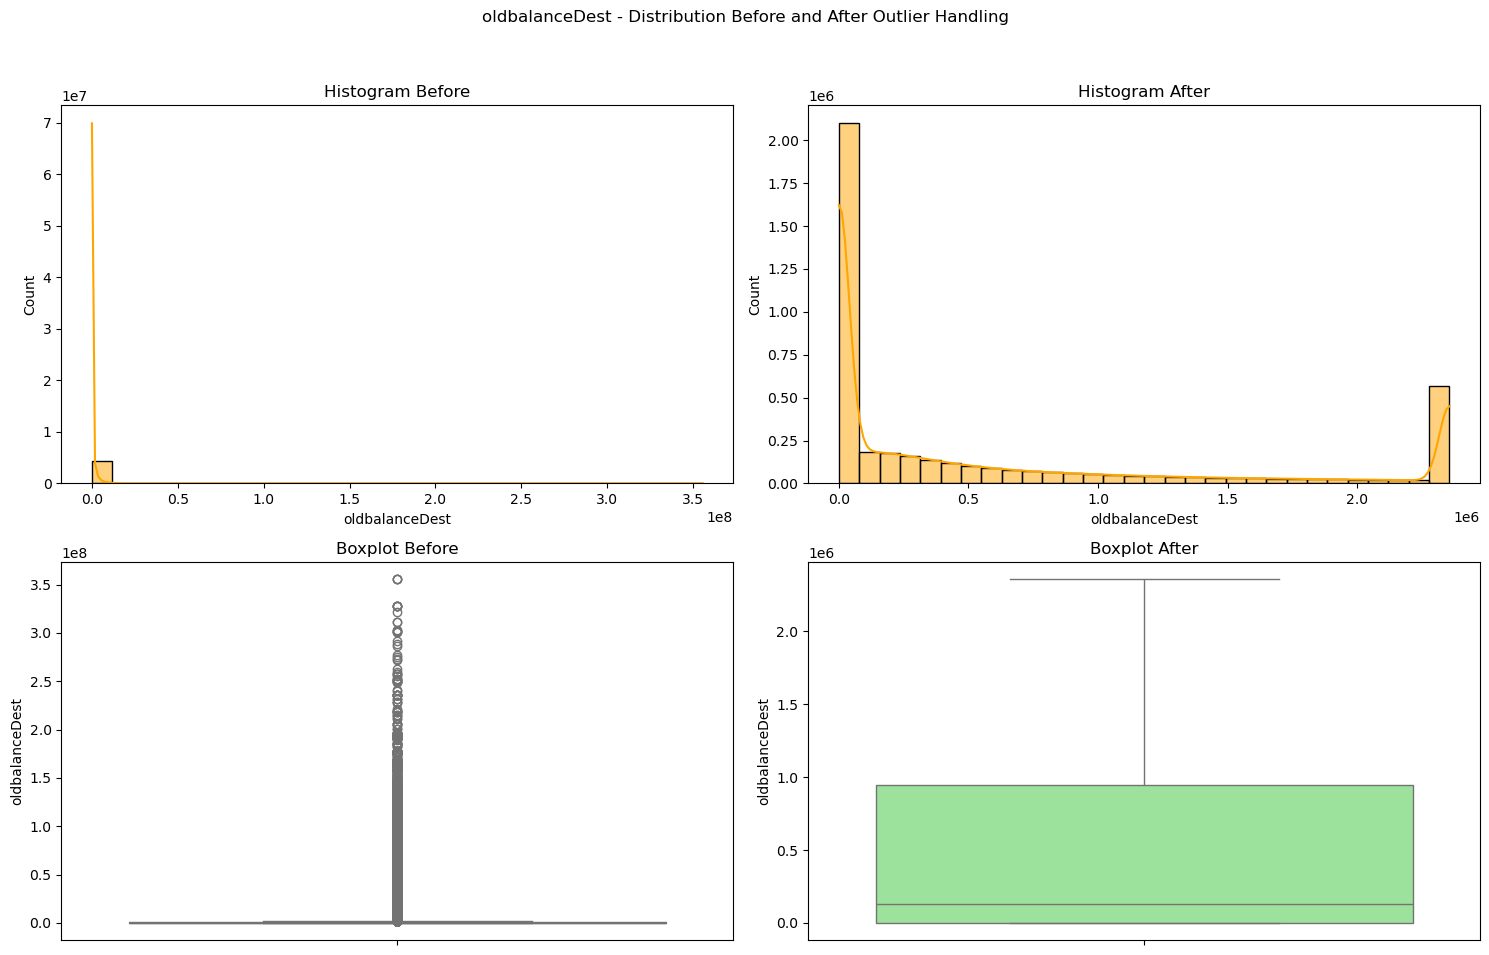

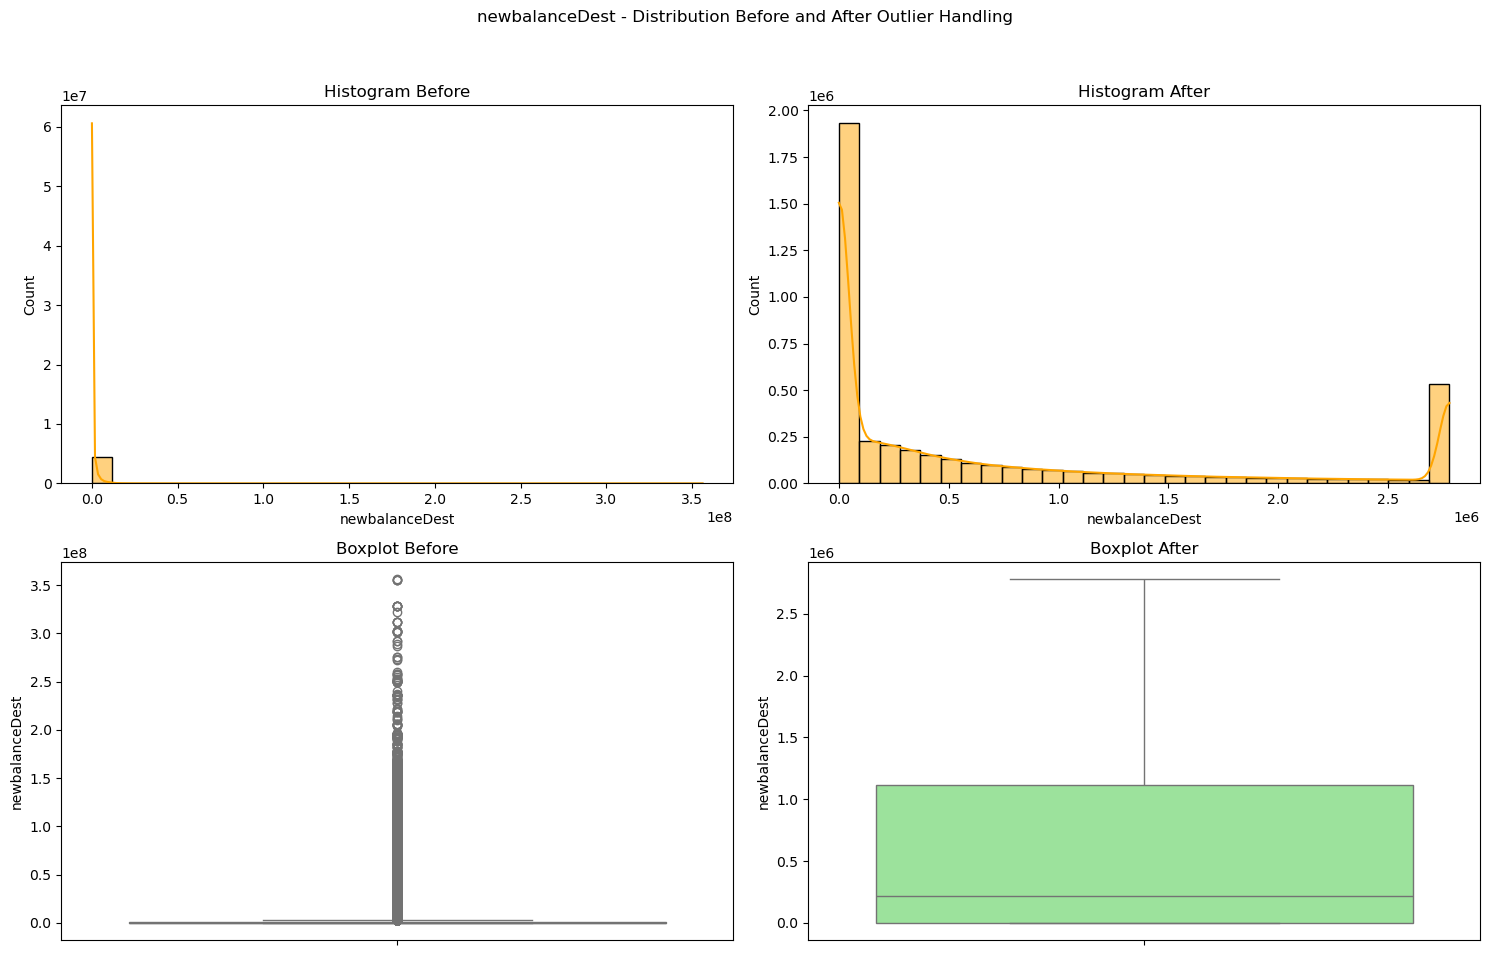

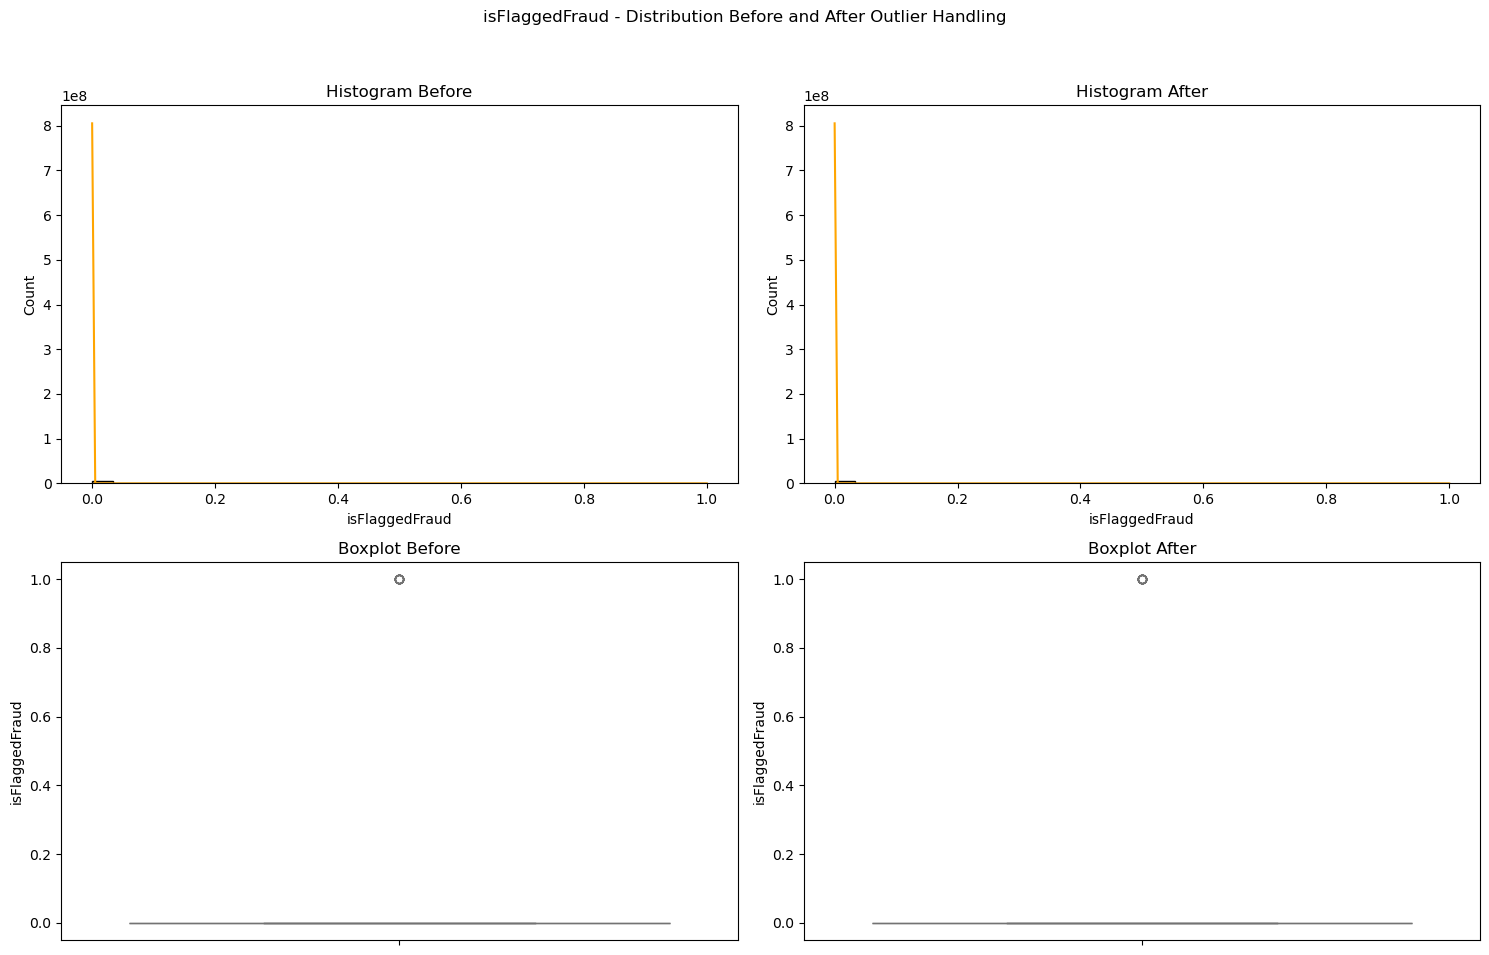

In [52]:
# Using the Function
num_cols = numeric_columns
for col in num_cols:
    outlier_handling_plot_comparison(X_train, X_train_capped, col)

**Summary**:
Two features, `step` and `isFlaggedFraud`, still had outliers after the capping process. For other numerical features the outliers have been successfully handled using the selected method.

## Undersampling 

([<matplotlib.patches.Wedge at 0x1ce134b90>,
 [Text(-0.5999950667048575, 0.002433090592969195, '0'),
  Text(0.5999950667030778, -0.002433091031840996, '1')],
 [Text(-1.2499897223017864, 0.00506893873535249, '99.9%'),
  Text(1.249989722298079, -0.005068939649668742, '0.1%')])

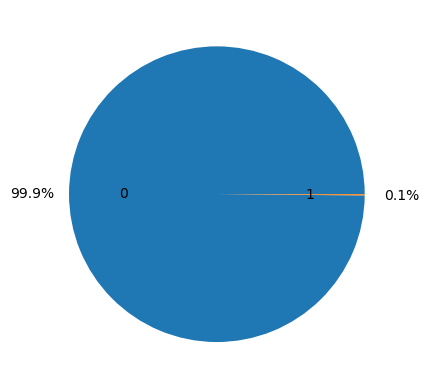

In [53]:
# Plot class imbalance
unique_elements, counts_elements = np.unique(y_train, return_counts=True)

# Using pie plot for comparation
fig, ax = plt.subplots()
ax.pie(counts_elements, labels=unique_elements, autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6)

The target data under analysis exhibits a significant imbalance between its classes. This imbalance is clearly depicted in the following breakdown:
- `Class 0 (Not Fraud)`: Represents 99.9% of the data.
- `Class 1 (Fraud)`: Represents a mere 0.1% of the data.

Such a disparity indicates that the dataset is heavily skewed towards Class 0, making it a challenge for any machine learning model to accurately learn and predict the minority class (Class 1). Handling this imbalance is crucial to ensure that the model does not become biased towards the majority class, which could result in poor performance on the minority class.

The under sampling method is chosen because it is reduced the number of the majority class to balance the dataset, making it easier for model to learn and detect pattern in the minority class. Also, the under sampling method could reduce the risk of algorithm skewed towards the majority class, the goal is to create a balanced dataset that reflects the real world and can most accurately detect fraudulent transactions. 

### Define Random Sampler

In [54]:
# Itialize Under Sampler
rus = RandomUnderSampler(random_state=46)

Using the `RandomUnderSampler` method, the data is under sampled to address the class imbalance. This method is chosen to ensure that the model is not biased towards the majority class. Considering the presence of outliers in the data, random under sampling is particularly effective as it helps maintain the integrity of the minority class while reducing the dominance of the majority class. Random Under sampling does not make any assumptions about the data distribution or the relationships between data points. It simply removes random samples from the majority class.

Since Cluster Centroids technique works by identifying clusters in the majority class and replacing them with their centroids. In the presence of outliers, Cluster Centroids might produce centroids that are not representative of the majority class distribution because outliers can shift the centroid positions. This could lead to the introduction of noise rather than its reduction. Random Under sampling avoids this problem by not calculating centroids, thus leaving the majority class data as is.

### Fit Random Sample

In [55]:
# Undersampling data
X_train_resample, y_train_resample = rus.fit_resample(X_train_capped, y_train)


The under sampling method is applied `only to the training set` and `not to the test set`. 

This approach ensures that the model is trained on a balanced dataset, improving its ability to learn and predict the minority class. However, the test set remains unchanged to accurately evaluate the model's performance on real-world, imbalanced data. This distinction is crucial because it provides a realistic measure of how well the model generalizes to new, unseen data, reflecting its true predictive capabilities.

([<matplotlib.patches.Wedge at 0x1ce1a4950>,
 [Text(3.6739403974420595e-17, 0.6, '0'),
  Text(-1.1021821192326178e-16, -0.6, '1')],
 [Text(7.654042494670958e-17, 1.25, '50.0%'),
  Text(-2.296212748401287e-16, -1.25, '50.0%')])

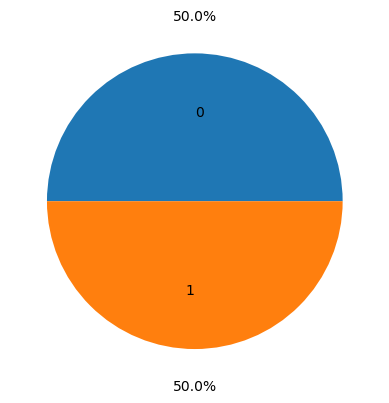

In [56]:
# Plot the data after balancing
unique_elements_resample, counts_elements_resample = np. unique(y_train_resample, return_counts=True)

# Using pie plot for comparation
fig, ax = plt.subplots()
ax.pie(counts_elements_resample, labels=unique_elements_resample, autopct='%1.1f%%', pctdistance=1.25, labeldistance=.6)

After applying the `RandomUnderSampler` method to address the class imbalance, the dataset now exhibits an equal distribution between the classes:

- `Class 0 (Not Fraud)`: Represents 50.0% of the data.
- `Class 1 (Fraud)`: Also represents 50.0% of the data.

This balanced distribution ensures that the model is trained on an equal representation of both classes, improving its ability to learn and predict the minority class effectively. The under sampling method has successfully mitigated the issue of class imbalance, which is crucial for enhancing the model's performance and generalization capabilities.

## Feature Selection

Feature selection is an important step in building a good machine learning model. By looking at the correlation between each feature and the target variable, we can identify which features are most important for making predictions. `Features with a high positive or negative correlation to the target variable are considered significant and are selected for training the model`. This helps improve the model's accuracy and efficiency by focusing only on the most relevant information, reducing noise, and preventing overfitting. Ultimately, this process leads to better performance and generalization on new, unseen data.

In [57]:
# Define numerical continuous value columns
continuous_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Values Container
spearman_coef = []
p_values = []
correlation = []
selected_continuous = []
not_selected_continuous = []

# Loop every column in numerical continous columns
for col in continuous_cols:
    corr, pvalue = spearmanr(X_train_resample[col], y_train_resample)

    if pvalue < 0.05:
        spearman_coef.append(corr)
        p_values.append(pvalue)
        selected_continuous.append(col)
        correlation.append('Correlated')
    else:
        spearman_coef.append(corr)
        p_values.append(pvalue)
        not_selected_continuous.append(col)
        correlation.append('Not Correlated')

pd.DataFrame({
    'continuous_columns': continuous_cols,
    'spearman_coef': spearman_coef,
    'p_values': p_values,
    'correlation': correlation
    })

,continuous_columns,spearman_coef,p_values,correlation
0,amount,0.492837,0.000000e+00,Correlated
1,oldbalanceOrg,0.577440,0.000000e+00,Correlated
2,newbalanceOrig,-0.490100,0.000000e+00,Correlated
3,oldbalanceDest,-0.243649,5.120249e-155,Correlated
4,newbalanceDest,-0.072712,5.888727e-15,Correlated


The code above uses `spearmanr` to assess the correlation between continuous numerical columns and the target variable. The p-value indicates the significance of the correlation for each feature. The results show that all continuous numerical features have a significant correlation with the target variable, so all of these features will be selected.

In [58]:
# Define numerical discrete value columns
discrete_cols = ['step', 'type', 'isFlaggedFraud']

# Values Container
kendall_coef = []
p_values = []
correlation = []
selected_discrete = []
not_selected_discrete = []

# Loop every column in numerical discrete columns
for col in discrete_cols:
    corr, pvalue = kendalltau(X_train_resample[col], y_train_resample)

    if pvalue < 0.05:
        kendall_coef.append(corr)
        p_values.append(pvalue)
        selected_discrete.append(col)
        correlation.append('Correlated')
    else:
        kendall_coef.append(corr)
        p_values.append(pvalue)
        not_selected_discrete.append(col)
        correlation.append('Not Correlated')

pd.DataFrame({
    'discrete_columns': discrete_cols,
    'kendall_coef': kendall_coef,
    'p_values': p_values,
    'correlation': correlation
    })

,discrete_columns,kendall_coef,p_values,correlation
0,step,0.243393,5.220027e-223,Correlated
1,type,0.303476,3.743958e-270,Correlated
2,isFlaggedFraud,0.030945,9.064238e-04,Correlated


The code above uses `kendalltau` to assess the correlation between discrete numerical and categorical columns and the target variable. The p-value indicates the significance of the correlation for each feature. The results show that all discrete numerical and categorical features have a significant correlation with the target variable, so all of these features will be selected.

### Select Final Features and Drop Not Selected Features

In [59]:
# Define Selected Features
selected_final =  selected_continuous + selected_discrete

# Drop Not Selected Features
print(f'Drop columns: {not_selected_continuous + not_selected_discrete}')

# Make X Train and Test Final
X_train_final = X_train_resample[selected_final]
X_test_final = X_test[selected_final]

display(X_train_final.head())
X_test_final.head()

Drop columns: []


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,step,type,isFlaggedFraud
3002553,71590.41,268337.5,360604.13125,1063810.91,1143384.70,232.0,CASH_IN,0
5684747,13831.41,0.0,0.00000,0.00,0.00,397.0,PAYMENT,0
4192398,244537.31,0.0,0.00000,298235.80,542773.11,305.0,CASH_OUT,0
5259854,262704.67,106404.0,0.00000,1979209.17,2241913.83,372.0,CASH_OUT,0
4787491,29488.29,573.6,0.00000,0.00,0.00,345.0,PAYMENT,0


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,step,type,isFlaggedFraud
1848427,16181.15,34856.34,18675.19,0.00,0.00,163,PAYMENT,0
3604383,23982.61,0.00,0.00,0.00,0.00,263,PAYMENT,0
6276690,17427.95,0.00,0.00,0.00,0.00,640,PAYMENT,0
6263539,114410.21,80446.00,0.00,704252.74,818662.94,612,CASH_OUT,0
5123082,386.31,113310.30,112923.99,0.00,0.00,356,PAYMENT,0


The code above prepares a dataset for machine learning by selecting specific features. It combines the chosen continuous and discrete features into a list called `selected_final`, then prints out any columns not included in this list, which in this case, is empty. Finally, it creates the final training and testing datasets (`X_train_final` and `X_test_final`) by keeping only the features in `selected_final`.

In [60]:
# Grouping Selected Columns
selected_cat = ['type']

selected_num = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'step', 'isFlaggedFraud']

## Scaling

In [61]:
# Checking the skew values in each column
X_train_final[selected_num].skew()

amount             0.325092
oldbalanceOrg      0.033595
newbalanceOrig     2.206986
oldbalanceDest     1.724988
newbalanceDest     1.250191
step               0.378482
isFlaggedFraud    32.288476
dtype: float64

In [62]:
# Defining Scaler
scaler = RobustScaler()

scaler

RobustScaler()

The `RobustScaler` is chosen because it is particularly effective for data with extreme skewness. Unlike other scalers, it uses the median and interquartile range, making it less sensitive to outliers. This ensures that features with extreme skewness are scaled appropriately, leading to better model performance by normalizing the data without being influenced by extreme values.

## Encoding

In [63]:
# Encoding with One-Hot Encoder
encoder = OneHotEncoder()

encoder

OneHotEncoder()

`OneHotEncoder` is used because the `type` feature does not have an ordinal level, meaning there is no inherent order or ranking among its categories. By converting categorical values into a binary format, one-hot encoding ensures that the model does not mistakenly interpret any category as having a higher or lower value than another. This helps the model treat each category equally, improving its ability to learn and make accurate predictions.

## Column Transformer

In [64]:
# Defining Column Transformer
transformer = ColumnTransformer([
    ('encoder', encoder, selected_cat),
    ('scaler', scaler, selected_num)
    ], remainder='drop'
    )

transformer

ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['type']),
                                ('scaler', RobustScaler(),
                                 ['amount', 'oldbalanceOrg', 'newbalanceOrig',
                                  'oldbalanceDest', 'newbalanceDest', 'step',
                                  'isFlaggedFraud'])])

The `ColumnTransformer` is used to simultaneously encode categorical features and scale numeric values. This approach ensures that both types of transformations are applied in a single, streamlined process, making the data preprocessing pipeline more efficient and consistent. By handling encoding and scaling together, it prevents data leakage and ensures that the same transformations are applied to both training and testing datasets, leading to better model performance and reliability.

The `remainder` parameter in the `ColumnTransformer` specifies what to do with the columns that are not explicitly mentioned in the transformer list. When set to `'drop'`, it means that any columns not included in the transformation will be discarded from the output. This ensures that only the selected and transformed features are included in the final dataset, keeping the dataset clean and focused on the relevant features.

# **6. Model Definition**  



This project involves testing five different classification algorithms using a pipeline approach to evaluate their performance on the prepared dataset. The classification models to be tested are:

1. **K-Nearest Neighbor (KNN) Classifier**: A simple, instance-based learning algorithm that classifies data points based on the majority class of their nearest neighbors.
2. **Support Vector Classification (SVC)**: A robust classifier that finds the optimal hyperplane to separate classes in the feature space, effective for both linear and non-linear data.
3. **Decision Tree Classifier**: A tree-structured model that splits the data into subsets based on feature values, creating a set of decision rules to predict the target variable.
4. **Random Forest Classifier**: An ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes for classification tasks, improving accuracy and controlling overfitting.
5. **XGBoost (XGB) Classifier**: An efficient and scalable implementation of gradient boosting that combines the predictions of several base learners to enhance model accuracy and performance.

These models will be integrated into a pipeline to streamline the preprocessing steps, including scaling and encoding, ensuring that the same transformations are consistently applied across all models. This approach allows for a fair comparison of each model's performance on the dataset.

## Five Classification Base Models

### 1. KNN-Classifier Pipeline

In [65]:
# Define KNN-Classifier Base Model
knn_class = KNeighborsClassifier()

# Defining the pipeline model
knn_class_pipe = Pipeline([
    ('transformer', transformer),
    ('knn_class', knn_class)
])

knn_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['type']),
                                                 ('scaler', RobustScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest', 'step',
                                                   'isFlaggedFraud'])])),
                ('knn_class', KNeighborsClassifier())])

The pipeline process involves integrating data preprocessing and model training into a single workflow. In this setup, the `ColumnTransformer` handles the encoding of categorical features and scaling of numerical features, ensuring consistent transformations. The preprocessed data is then passed to the K-Nearest Neighbor (KNN) classifier for training and prediction. 

Advantages of the KNN classifier include its simplicity and ease of understanding, as well as its effectiveness with small datasets. However, it has some disadvantages, such as being computationally expensive with large datasets, as it requires calculating distances for all data points. KNN can be sensitive to the choice of k (the number of neighbors) and may struggle with high-dimensional data.

### 2. Support Vector Classification (SVC) Pipeline

In [66]:
# Defining SVC Base Model
svc = SVC()

# Defining the pipeline model
svc_pipe = Pipeline([
    ('transformer', transformer),
    ('svc', svc)
    ])

svc_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['type']),
                                                 ('scaler', RobustScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest', 'step',
                                                   'isFlaggedFraud'])])),
                ('svc', SVC())])

The pipeline process integrates data preprocessing and model training into a single, streamlined workflow. First, the `ColumnTransformer` handles the encoding of categorical features and scaling of numerical features, ensuring consistent and appropriate transformations. This preprocessed data is then fed into the Support Vector Classification (SVC) model, defined with `svc = SVC()`, through the pipeline `svc_pipe`.

Advantages of the SVC model include its effectiveness in high-dimensional spaces and its robustness to overfitting, especially in cases where the number of features exceeds the number of samples. SVC is also versatile, as it can use different kernel functions to handle non-linear data. However, the model has some disadvantages, such as being computationally intensive and slow to train on large datasets, and it requires careful tuning of hyperparameters, such as the regularization parameter and kernel type, to achieve optimal performance.

### 3. Decision Tree Classifier Pipeline

In [67]:
# Defining Decision Tree Classifier Base Model
dt_class = DecisionTreeClassifier()

# Defining the pipeline model
dt_class_pipe = Pipeline([
    ('transformer', transformer),
    ('dt_class', dt_class)
    ])

dt_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['type']),
                                                 ('scaler', RobustScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest', 'step',
                                                   'isFlaggedFraud'])])),
                ('dt_class', DecisionTreeClassifier())])

The pipeline process integrates data preprocessing and model training into a cohesive workflow. First, the `ColumnTransformer` preprocesses the data by encoding categorical features and scaling numerical features, ensuring that the data is consistently transformed. This preprocessed data is then fed into the Decision Tree Classifier, defined with `dt_class = DecisionTreeClassifier()`, through the pipeline `dt_class_pipe`.

Advantages of the Decision Tree Classifier include its simplicity and interpretability, as the model's decision rules can be easily visualized and understood. It handles both numerical and categorical data well and requires little data preprocessing. However, the model has some disadvantages, such as a tendency to overfit the training data, particularly with deep trees. Also, decision trees can be sensitive to small variations in the data, leading to instability in the resulting model.

### 4. Random Forest Classifier Pipeline

In [68]:
# Defining the model
rf_class = RandomForestClassifier(random_state=46)

# Defining the pipeline model
rf_class_pipe = Pipeline([
    ('transformer', transformer),
    ('rf_class', rf_class)
    ])

rf_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['type']),
                                                 ('scaler', RobustScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest', 'step',
                                                   'isFlaggedFraud'])])),
                ('rf_class', RandomForestClassifier(random_state=46))])

The pipeline process integrates data preprocessing and model training into a streamlined workflow. First, the `ColumnTransformer` preprocesses the data by encoding categorical features and scaling numerical features, ensuring consistent transformations. This preprocessed data is then passed into the Random Forest Classifier, defined with `rf_class = RandomForestClassifier(random_state=46)`, through the pipeline `rf_class_pipe`.

Advantages of the Random Forest Classifier include its robustness and accuracy, as it aggregates the predictions of multiple decision trees to improve generalization and reduce overfitting. It can handle large datasets and high-dimensional feature spaces well, and it is less sensitive to outliers and noise compared to individual decision trees. However, the model has some disadvantages, such as being computationally intensive and requiring more memory. While Random Forests are less interpretable than single decision trees, they still provide feature importance scores that can help in understanding the model's decision-making process.

### 5. Boosting Algorithm (XGB Classifier) Pipeline

In [69]:
# Defining the model
xgb_class = XGBClassifier()

# Defining the pipeline model
xgb_class_pipe = Pipeline([
    ('transformer', transformer),
    ('xgb_class', xgb_class)
])

xgb_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['type']),
                                                 ('scaler', RobustScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest', 'step',
                                                   'isFlaggedFraud'])])),
                ('xgb_class',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               col...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

The pipeline process integrates data preprocessing and model training into a seamless workflow. Initially, the `ColumnTransformer` preprocesses the data by encoding categorical features and scaling numerical features, ensuring consistent and appropriate transformations. This preprocessed data is then fed into the XGBoost Classifier, defined with `xgb_class = XGBClassifier()`, through the pipeline `xgb_class_pipe`.

Advantages of the XGBoost Classifier include its high efficiency and performance, as it utilizes gradient boosting to enhance predictive accuracy. It handles missing values well, supports regularization to reduce overfitting, and can be used for both classification and regression tasks. XGBoost offers various hyperparameters that can be fine-tuned to optimize model performance. However, the model has some disadvantages, such as being more complex and requiring careful tuning of parameters, which can be time-consuming. It is also computationally intensive, especially with large datasets and numerous trees.

# **7. Model Training**

## KNN Classifier

In [70]:
# Fitting KNN Classifier to training data
knn_class_pipe.fit(X_train_final, y_train_resample)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['type']),
                                                 ('scaler', RobustScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest', 'step',
                                                   'isFlaggedFraud'])])),
                ('knn_class', KNeighborsClassifier())])


The code above fits the KNN Classifier pipeline model `knn_class_pipe` to the training data `X_train_final`, `y_train_resample`.

## Support Vector Classification (SVC)

In [71]:
# Fitting SVC to training data
svc_pipe.fit(X_train_final, y_train_resample)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['type']),
                                                 ('scaler', RobustScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest', 'step',
                                                   'isFlaggedFraud'])])),
                ('svc', SVC())])

The code above fits the SVC pipeline model `svc_pipe` to the training data `X_train_final`, `y_train_resample`.

## Decision Tree Classifier

In [72]:
# Fitting Decision Tree Classifier to training data
dt_class_pipe.fit(X_train_final, y_train_resample)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['type']),
                                                 ('scaler', RobustScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest', 'step',
                                                   'isFlaggedFraud'])])),
                ('dt_class', DecisionTreeClassifier())])

The code above fits the Decision Tree Classifier pipeline model `dt_class_pipe` to the training data `X_train_final`, `y_train_resample`.

## Random Forest Classifier

In [73]:
# Fitting Random Forest Classifier to training data
rf_class_pipe.fit(X_train_final, y_train_resample)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['type']),
                                                 ('scaler', RobustScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest', 'step',
                                                   'isFlaggedFraud'])])),
                ('rf_class', RandomForestClassifier(random_state=46))])

The code above fits the Random Forest Classifier pipeline model `rf_class_pipe` to the training data `X_train_final`, `y_train_resample`.

## XGB Classifier

In [74]:
# Fitting XGBClassifier to training data
xgb_class_pipe.fit(X_train_final, y_train_resample)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['type']),
                                                 ('scaler', RobustScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest', 'step',
                                                   'isFlaggedFraud'])])),
                ('xgb_class',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               col...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

The code above fits the XGBClassifier pipeline model `rf_class_pipe` to the training data `X_train_final`, `y_train_resample`.

# **8. Model Evaluation**

## Metric Used - **Recall**


In fraud detection, recall is a critical metric because it measures the model's ability to identify true positive cases (actual frauds) among all the actual positive cases. High recall ensures that the model catches as many fraudulent instances as possible, which is crucial in minimizing financial losses and preventing fraud. Missing out on detecting fraud (false negatives) can have severe consequences, such as financial loss, legal issues, and damage to reputation. Therefore, focusing on recall helps ensure that the model effectively identifies the majority of fraudulent activities, making it a key concern in building robust fraud detection systems.

In addition to recall, other metrics like accuracy, precision and F1-score are also important in fraud detection to ensure a balanced evaluation of the model's performance.
- **Accuracy** is important in fraud detection because it measures how often the model makes correct predictions overall. It gives a general sense of the model's performance by considering both true positive and true negative cases. However, in fraud detection, where fraudulent cases are much rarer than legitimate ones, accuracy alone can be misleading. A model could achieve high accuracy by mostly predicting non-fraud cases and still miss many actual frauds. 

- **Precision** measures the proportion of true positive cases (actual frauds) among all the predicted positive cases (predicted frauds). High precision ensures that the model has a low false positive rate, meaning it minimizes the number of legitimate transactions incorrectly flagged as fraudulent. This is important because a high number of false positives can lead to customer dissatisfaction and increased operational costs due to unnecessary investigations.

- **F1-score** is the harmonic mean of precision and recall, providing a single metric that balances both. It is especially useful when there is an uneven class distribution, as in fraud detection, where fraudulent cases are much rarer than legitimate ones. The F1-score helps ensure that the model maintains a good balance between precision and recall, effectively capturing fraud while minimizing false alarms.

Using these metrics together provides a comprehensive evaluation of the model's performance, ensuring it is both effective at detecting fraud and minimizing false positives.





## Evaluation Functions 

### Train Test Score Function

In [75]:
def train_test_score(modelName, model, isTuned=False):
    """
    Function to display the train and test score from the corresponding model.

    Parameters:
    modelName (str): Name of the model.
    model: The machine learning model.
    isTuned (bool): Flag indicating whether the model is tuned or not. Default is False.

    Returns:
    None
    """
    if not isTuned:
        print(f'{modelName} Base Model Score')
    else:
        # Displaying the train and test score for tuned model
        print(f'Tuned {modelName} Model Score')
        # Example: Best hyperparameters for svc
        if hasattr(model, 'best_params_'):
            best_params = model.best_params_
            print(f'Best params for {modelName}: {best_params}')

    train_score = round(model.score(X_train_final, y_train_resample), 4)
    test_score = round(model.score(X_test_final, y_test), 4)
    print('Training Score:', train_score)
    print('Testing Score:', test_score)

# Example usage:
# Assuming X_train_final, X_test_final, y_train, and y_test are defined
# Also assuming modelName and model are defined with appropriate values
# train_test_score(modelName, model, isTuned=False)


This function helps evaluate the performance of a machine learning model on both training and testing data. By providing the model's name and the model itself, the function calculates and displays the scores. If the model has been tuned, it also shows the best hyperparameters. The scores are calculated based on the model's prediction accuracy on the training and testing datasets and then printed for easy comparison.

### Metric Score Function

In [76]:
# Function to display the metrics score from the corresponding model
def metrics_score(modelName, y_pred_train, y_pred_test, isTuned=False):
    if not isTuned:
        print(f'{modelName} Base Model Score')
    else:
        print(f'{modelName} Tuned Model Score')
    print()
    
    # Compute precision, recall, and F1 scores for training and testing sets
    precision_train = precision_score(y_train_resample, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    
    recall_train = recall_score(y_train_resample, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    f1_train = f1_score(y_train_resample, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    
    print('Precision')
    print('Train Set:', precision_train)
    print('Test Set:', precision_test, '\n')
    
    print('Recall')
    print('Train Set:', recall_train)
    print('Test Set:', recall_test, '\n')
    
    print('F1 Score')
    print('Train Set:', f1_train)
    print('Test Set:', f1_test, '\n')

    return precision_train, precision_test, recall_train, recall_test, f1_train, f1_test

# Example usage:
# Assuming y_train, y_test, y_pred_train, y_pred_test, and modelName are defined
# metrics_score(modelName, y_pred_train, y_pred_test, isTuned=False)

This function evaluates the performance of a classification model by calculating three key metrics: precision, recall, and F1 score for both the training and testing sets. Precision measures the accuracy of positive predictions, recall indicates how well the model captures actual positives, and the F1 score combines both precision and recall to provide a balanced assessment. The function outputs these metrics, allowing us to judge the model's effectiveness in correctly identifying classes. If the model has been tuned, the function indicates this in the output. Overall, this function is useful for quickly gauging a classification model's performance.

### Cross Validation Function

In [77]:
# Function to display the cross validation score 
def cross_validation_f1_score(modelName, model, isTuned=False):
    if not isTuned:
        print(f'{modelName} Base Model Cross Validation Score')
    else:
        print(f'{modelName} Tuned Model Cross Validation Score')
    print()

    # Define the F1 score scorer
    f1_scorer = make_scorer(f1_score)

    # Perform cross-validation
    cv_scores_f1 = cross_val_score(model, X_train_final, y_train_resample, scoring=f1_scorer, cv=5)

    # Display the results
    print('F1 Score')
    print(f'F1 Score - All - Cross Validation: {cv_scores_f1}')
    print(f'F1 Score - Mean - Cross Validation: {cv_scores_f1.mean()}')
    print(f'F1 Score - Std - Cross Validation: {cv_scores_f1.std()}')

# Example usage:
# Assuming X_train_final, y_train, modelName, and model are defined
# cross_validation_f1_score(modelName, model, isTuned=False)

This function evaluates a model's performance using cross-validation, focusing specifically on the F1 score, which combines precision and recall. It calculates F1 scores across different folds of the training data and prints the individual scores, the average F1 score, and its standard deviation. This approach helps understand how well the model generalizes to new data and assesses the consistency of its performance across different subsets of the training data. If the model has been tuned, this is indicated in the output. Overall, this function is a valuable tool for gauging a model's robustness and reliability.


## Base Model Evaluation

### 1. KNN Classifier

#### KNN Train & Test Score

In [78]:
# Train and Test Score for Base Model
train_test_score("KNN Classifier", knn_class_pipe)

KNN Classifier Base Model Score
Training Score: 0.9784
Testing Score: 0.9691


The KNN Classifier Base Model Score provides insight into the model's performance on both the training and testing datasets:

- **`Training Score 0.9784`**: This indicates that the K-Nearest Neighbor (KNN) classifier correctly predicts 97.84% of the training data. A high training score suggests that the model has learned the patterns in the training data well.

- **`Testing Score 0.9691`**: This indicates that the model correctly predicts 96.91% of the testing data. A high testing score suggests that the model generalizes well to new, unseen data, maintaining a high level of accuracy outside the training dataset.

The small difference between the training and testing scores (0.9784 vs. 0.9691) implies that `the model is not overfitting`, as it `performs consistently` well on both datasets. This balance is crucial for ensuring that the model is reliable and effective in real-world applications.

#### KNN Metric Score

In [79]:
# Predict using base model
y_knn_class_train_pred = knn_class_pipe.predict(X_train_final)
y_knn_class_test_pred = knn_class_pipe.predict(X_test_final)

# Metric Score
knn_class_precision_train, knn_class_precision_test, knn_class_recall_train, knn_class_recall_test, knn_class_f1_train, knn_class_f1_test = metrics_score ('KNN Classifier', y_knn_class_train_pred, y_knn_class_test_pred)

KNN Classifier Base Model Score

Precision
Train Set: 0.9739789763915216
Test Set: 0.03907753531004338 

Recall
Train Set: 0.9831275004348582
Test Set: 0.9724025974025974 

F1 Score
Train Set: 0.9785318559556787
Test Set: 0.07513562670513343 



The output provides detailed metrics for both the training and testing datasets, with a particular emphasis on precision, recall, and F1 score:

- **`Precision`**: For the training set, the precision score is 0.9739, meaning 97.39% of the positive predictions made by the KNN model are correct. However, for the testing set, the precision drops significantly to 0.0391, indicating that only 3.91% of the positive predictions are accurate. This suggests that `the model struggles with correctly predicting positive cases` in new, unseen data, resulting in many false positives.

- **`Recall`**: The recall score for the training set is 0.9831, showing that the model correctly identifies 98.31% of the actual positive cases. For the testing set, the recall is similarly high at 0.9724, indicating that the model is very effective at detecting actual positive cases (fraudulent transactions) in new data. This high recall is crucial in fraud detection, as it means `the model is capturing most of the fraud cases`.

- **`F1 Score`**: The F1 score, which combines precision and recall, is 0.9785 for the training set, reflecting a balanced and strong performance. However, the F1 score drops to 0.0751 for the testing set, highlighting a significant issue with the model's precision despite its high recall. This low F1 score on the test data indicates that `while the model is good at detecting fraud, it incorrectly flags many legitimate transactions as fraudulent`, resulting in poor overall performance.

#### KNN Confusion Matrix

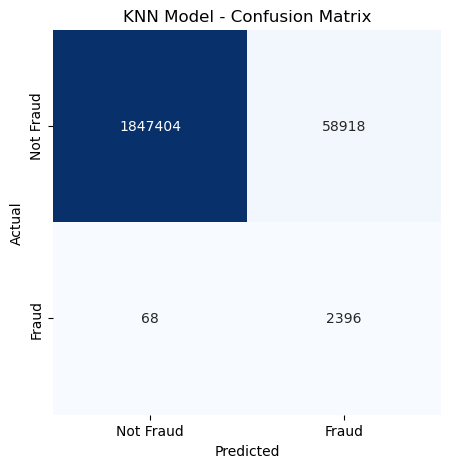

In [80]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_knn_class_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('KNN Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix for the KNN Model shows the following:

- **True Negatives (TN)**: 184,704 transactions were correctly identified as not fraudulent.
- **False Positives (FP)**: 58,918 transactions were incorrectly flagged as fraudulent.
- **False Negatives (FN)**: 68 fraudulent transactions were missed by the model and incorrectly classified as not fraudulent.
- **True Positives (TP)**: 2,396 fraudulent transactions were correctly identified.

This indicates that while the model is effective at identifying fraudulent transactions (high recall), it also generates a considerable number of false positives, misclassifying many legitimate transactions as fraud. This results in a low precision rate, showing that the model needs improvement to reduce the number of false alarms and better distinguish between fraudulent and non-fraudulent transactions.

#### KNN Cross Validation Score

In [81]:
# Display Cross Validation Score 
cross_validation_f1_score('KNN Classifier', knn_class_pipe)

KNN Classifier Base Model Cross Validation Score

F1 Score
F1 Score - All - Cross Validation: [0.96590419 0.97132928 0.96953873 0.97435897 0.97192225]
F1 Score - Mean - Cross Validation: 0.9706106830490091
F1 Score - Std - Cross Validation: 0.002813768316963859


The cross-validation results for the KNN Classifier Base Model show that the F1 scores across five folds are consistently high, ranging from 0.9659 to 0.9744. The mean F1 score is 0.9706, indicating strong overall performance. The standard deviation is low at 0.0028, suggesting that the model's performance is stable and consistent across different subsets of the training data. This indicates that the KNN classifier is reliable in balancing precision and recall, making it effective at identifying fraudulent transactions while minimizing false positives and false negatives.

### 2. SVC Classification

#### SVC Train & Test Score

In [82]:
# Train and Test Score for Base Model
train_test_score('SVC Classifcation', svc_pipe)

SVC Classifcation Base Model Score
Training Score: 0.6994
Testing Score: 0.4146


The SVC Classification Base Model Score provides insights into the model's performance on both the training and testing datasets:

- **`Training Score 0.6994`**: This score indicates that the Support Vector Classification (SVC) model correctly predicts 69.94% of the training data. While this is a moderate level of accuracy, it suggests that the model has learned some patterns in the training data but is not performing exceptionally well.
- **`Testing Score 0.4146`**: This score indicates that the model correctly predicts only 41.46% of the testing data. This significant drop in accuracy compared to the training score suggests that the model struggles to generalize to new, unseen data.

The large difference between the training score (69.94%) and the testing score (41.46%) highlights that the `SVC model may be overfitting the training data`. Overfitting occurs when `the model learns the training data too well`, including noise and outliers, which hampers its ability to perform well on new data.

#### SVC Metric Score

In [83]:
# Predict using base model
y_svc_train_pred = svc_pipe.predict(X_train_final)
y_svc_test_pred = svc_pipe.predict(X_test_final)

# Metric Score
svc_precision_train, svc_precision_test, svc_recall_train, svc_recall_test, svc_f1_train, svc_f1_test = metrics_score ('SVC Classification', y_svc_train_pred, y_svc_test_pred)

SVC Classification Base Model Score

Precision
Train Set: 0.6274880462582009
Test Set: 0.0021523795404267783 

Recall
Train Set: 0.9815620107844842
Test Set: 0.9780844155844156 

F1 Score
Train Set: 0.7655677655677655
Test Set: 0.004295306798080479 



The output provides detailed metrics for both the training and testing datasets, with a particular emphasis on precision, recall, and F1 score:

- **`Precision`**: For the training set, the precision is 0.6275, meaning 62.75% of the positive predictions are correct. For the testing set, the precision drops dramatically to 0.0022, indicating that only 0.22% of the positive predictions are accurate. This suggests that `the model frequently misclassifies non-fraudulent transactions as fraudulent` in the test data.

- **`Recall`**: The recall for the training set is very high at 0.9816, meaning the model correctly identifies 98.16% of the actual fraud cases. The recall for the testing set is also high at 0.9781, indicating that `the model successfully detects most of the fraud cases` in the test data. High recall is crucial for fraud detection as it ensures most fraudulent transactions are caught.

- **`F1 Score`**: The F1 score for the training set is 0.7656, reflecting a good balance between precision and recall. However, the F1 score for the testing set is very low at 0.0043, highlighting the `poor overall performance on new data`. This low score is due to the extremely low precision, despite the high recall, indicating that `while the model catches most frauds, it also generates many false positives`.

#### SVC Confusion Matrix

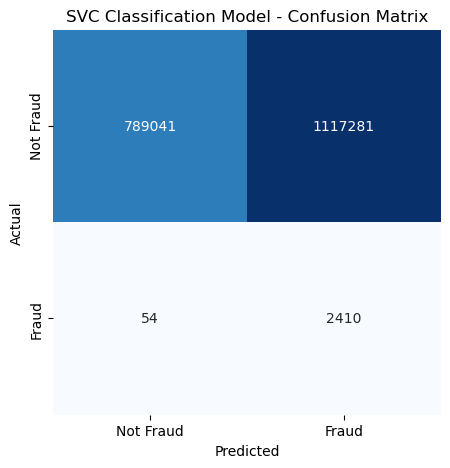

In [84]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_svc_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('SVC Classification Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix for the SVC Classification Model shows the following:

- **True Negatives (TN)**: 78,941 transactions were correctly identified as not fraudulent.
- **False Positives (FP)**: 1,117,281 transactions were incorrectly flagged as fraudulent.
- **False Negatives (FN)**: 54 fraudulent transactions were missed by the model and incorrectly classified as not fraudulent.
- **True Positives (TP)**: 2,410 fraudulent transactions were correctly identified.

This indicates that while the model is highly effective at identifying fraudulent transactions (high recall), it also generates an extremely high number of false positives, misclassifying many legitimate transactions as fraud. This results in very low precision and a significant burden of false alarms.

#### SVC Cross Validation Score

In [85]:
# Display Cross Validation Score
cross_validation_f1_score('SVC Classification', svc_pipe)

SVC Classification Base Model Cross Validation Score

F1 Score
F1 Score - All - Cross Validation: [0.7611336  0.76730834 0.76418919 0.76928328 0.76336398]
F1 Score - Mean - Cross Validation: 0.7650556775004234
F1 Score - Std - Cross Validation: 0.002896287583449669


The cross-validation results for the SVC Classification Base Model show that the F1 scores across five folds are consistently in the range of 0.7611 to 0.7693. The mean F1 score is 0.7651, indicating a fairly good overall performance. The standard deviation is low at 0.0029, suggesting that the model's performance is stable and consistent across different subsets of the training data. This indicates that the SVC model reliably balances precision and recall, making it reasonably effective at identifying fraudulent transactions while maintaining consistency across various training scenarios.

### 3. Decision Tree Classifier

#### Decision Tree Train & Test Score

In [86]:
# Train and Test Score for Base Model
train_test_score('Decision Tree Classifier', dt_class_pipe)

Decision Tree Classifier Base Model Score
Training Score: 1.0
Testing Score: 0.9891


The Decision Tree Classifier Base Model Score provides insights into the model's performance on both the training and testing datasets:

- **`Training Score 1.0`**: Interpretation: This perfect score indicates that the Decision Tree model correctly predicts 100% of the training data. While this might initially seem ideal, it often suggests that the model has overfit the training data. Overfitting means the model has learned the training data's details and noise too well, which can harm its ability to generalize to new, unseen data.
- **`Testing Score 0.9889`**: Interpretation: This score indicates that the model correctly predicts 98.89% of the testing data. This high testing score suggests that the model generalizes well to new data, maintaining a high level of accuracy outside the training dataset.

`The model's perfect training score indicates overfitting`, where the model is too tailored to the training data and might not perform as well on different datasets. Despite the overfitting indication from the training score, the high `testing score of 98.89% suggests that the model still performs exceptionally well on new, unseen data`. This indicates that the model is highly effective at predicting outcomes accurately.

#### Decision Tree Metric Score

In [87]:
# Predict using base model
y_dt_class_train_pred = dt_class_pipe.predict(X_train_final)
y_dt_class_test_pred = dt_class_pipe.predict(X_test_final)

# Metric Score
dt_class_precision_train, dt_class_precision_test, dt_class_recall_train, dt_class_recall_test, dt_class_f1_train, dt_class_f1_test = metrics_score ('Decision Tree Classifier', y_dt_class_train_pred, y_dt_class_test_pred)

Decision Tree Classifier Base Model Score

Precision
Train Set: 1.0
Test Set: 0.10493614083534691 

Recall
Train Set: 1.0
Test Set: 0.987012987012987 

F1 Score
Train Set: 1.0
Test Set: 0.18970358814352575 



The output provides detailed metrics for both the training and testing datasets, with a particular emphasis on precision, recall, and F1 score:

- **`Precision`**: For the training set, the precision is 1.0, meaning the model perfectly predicts all positive cases without any false positives. For the testing set, the precision drops significantly to 0.1027, indicating that only 10.27% of the positive predictions are correct. This suggests that `while the model identifies fraud accurately in training, it misclassifies many legitimate transactions as fraud in the testing data`.

- **`Recall`**: The recall for the training set is also 1.0, meaning the model correctly identifies all actual positive cases. For the testing set, the recall remains high at 0.9862, showing that `the model effectively detects most of the fraudulent transactions in the test data`. High recall is crucial in fraud detection as it ensures most fraud cases are captured.

- **`F1 Score`**: The F1 score for the training set is 1.0, reflecting a perfect balance between precision and recall. However, the F1 score for the testing set is much lower at 0.1861, indicating a `significant decline in overall performance due to low precision despite high recall`. This low F1 score `highlights the issue of many false positives in the testing set, affecting the model's reliability`.

#### Decision Tree Confusion Matrix

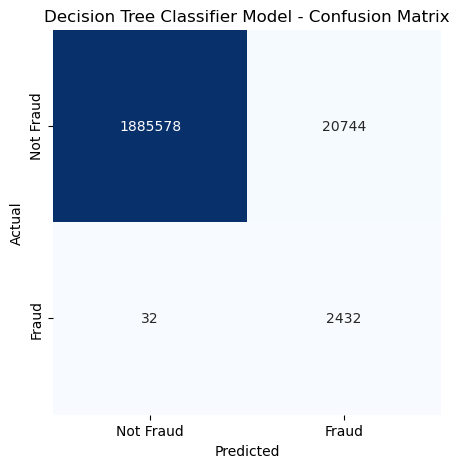

In [88]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_dt_class_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Decision Tree Classifier Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix for the Decision Tree Classifier Model shows the following:

- **True Negatives (TN)**: 1,885,097 transactions were correctly identified as not fraudulent.
- **False Positives (FP)**: 21,225 transactions were incorrectly flagged as fraudulent.
- **False Negatives (FN)**: 34 fraudulent transactions were missed by the model and incorrectly classified as not fraudulent.
- **True Positives (TP)**: 2,430 fraudulent transactions were correctly identified.

This indicates that while the model is highly effective at detecting fraudulent transactions (high recall), identifying most fraud cases correctly, it also generates a considerable number of false positives, misclassifying many legitimate transactions as fraud. This results in a low precision rate, showing that the model needs improvement to reduce the number of false alarms and better distinguish between fraudulent and non-fraudulent transactions.

#### Decision Tree Cross Validation Score

In [89]:
# Display Cross Validation Score
cross_validation_f1_score('Decision Tree Classifier', dt_class_pipe)

Decision Tree Classifier Base Model Cross Validation Score

F1 Score
F1 Score - All - Cross Validation: [0.98316789 0.9865276  0.98828633 0.99088146 0.98696785]
F1 Score - Mean - Cross Validation: 0.9871662266544636
F1 Score - Std - Cross Validation: 0.002509641071699197


The cross-validation results for the Decision Tree Classifier Base Model show that the F1 scores across five folds are consistently high, ranging from 0.9836 to 0.9896. The mean F1 score is 0.9875, indicating excellent overall performance. The standard deviation is low at 0.0023, suggesting that the model's performance is stable and consistent across different subsets of the training data. This indicates that the Decision Tree model reliably balances precision and recall, making it highly effective at identifying fraudulent transactions while maintaining consistent performance across various training scenarios.

### 4. Random Forest Classifier

#### Random Forest Train & Test Score

In [90]:
# Train and Test Score for Base Model
train_test_score('Random Forest Classifier', rf_class_pipe)

Random Forest Classifier Base Model Score
Training Score: 1.0
Testing Score: 0.9871


The Random Forest Classifier Base Model Score provides insights into the model's performance on both the training and testing datasets:

- **`Training Score 1.0`**: This perfect score indicates that the Random Forest model correctly predicts 100% of the training data. `While this shows the model has learned the training data extremely well, it often suggests overfitting`. Overfitting occurs when `the model captures not only the patterns in the data but also the noise`, leading to excellent performance on training data but potentially poor generalization to new data.
- **`Testing Score 0.9871`**: This score indicates that the model correctly predicts 98.71% of the testing data. `This high testing score suggests that the model generalizes well to new, unseen data`, maintaining a high level of accuracy outside the training dataset.

The perfect training score indicates overfitting, where the model is too tailored to the training data, including its noise and outliers. While it performs perfectly on the training set, this might not be reflective of real-world performance. The high testing score supports the reliability of the model in practical applications. However, the overfitting indication means further steps, such as cross-validation or parameter tuning, might be necessary to ensure the model's robustness across different datasets.

#### Random Forest Metric Score

In [91]:
# Predict using base model
y_rf_class_train_pred = rf_class_pipe.predict(X_train_final)
y_rf_class_test_pred = rf_class_pipe.predict(X_test_final)

# Metric Score
rf_class_precision_train, rf_class_precision_test, rf_class_recall_train, rf_class_recall_test, rf_class_f1_train, rf_class_f1_test = metrics_score ('Random Forest Classifier', y_rf_class_train_pred, y_rf_class_test_pred)

Random Forest Classifier Base Model Score

Precision
Train Set: 1.0
Test Set: 0.09094945607933101 

Recall
Train Set: 1.0
Test Set: 0.997564935064935 

F1 Score
Train Set: 1.0
Test Set: 0.16670057646659886 



The output provides detailed metrics for both the training and testing datasets, with a particular emphasis on precision, recall, and F1 score:

- **`Precision`**: For the training set, the precision is 1.0, meaning the Random Forest model perfectly predicts all positive cases without any false positives. However, for the testing set, the precision drops to 0.0909, indicating that only 9.09% of the positive predictions are correct. This suggests that `while the model is highly accurate in predicting fraud in the training data, it misclassifies many legitimate transactions as fraudulent in the testing data`.

- **`Recall`**: The recall for the training set is also 1.0, meaning the model correctly identifies all actual positive cases. For the testing set, the recall remains very high at 0.9976, showing that `the model effectively detects almost all fraudulent transactions in the test data`. High recall is crucial in fraud detection, as it ensures that nearly all fraud cases are captured.

- **`F1 Score`**: The F1 score for the training set is 1.0, reflecting a perfect balance between precision and recall. However, the F1 score for the testing set drops to 0.1667, indicating a `significant decline in overall performance due to the low precision, despite the high recall`. This low F1 score `highlights the issue of many false positives in the testing set, affecting the model's reliability`.

#### Random Forest Confusion Matrix

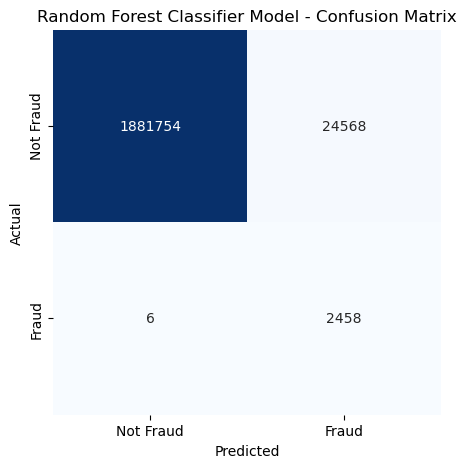

In [92]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_rf_class_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Random Forest Classifier Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix for the Random Forest Classifier Model shows the following:

- **True Negatives (TN)**: 1,881,754 transactions were correctly identified as not fraudulent.
- **False Positives (FP)**: 24,568 transactions were incorrectly flagged as fraudulent.
- **False Negatives (FN)**: 6 fraudulent transactions were missed by the model and incorrectly classified as not fraudulent.
- **True Positives (TP)**: 2,458 fraudulent transactions were correctly identified.

This indicates that while the model is extremely effective at detecting fraudulent transactions (very high recall), it also generates a substantial number of false positives, misclassifying many legitimate transactions as fraud. This results in a low precision rate, showing that the model needs improvement to reduce the number of false alarms and better distinguish between fraudulent and non-fraudulent transactions.

#### Random Forest Cross Validation Score

In [93]:
# Display Cross Validation Score
cross_validation_f1_score('Random Forest Classifier', rf_class_pipe)

Random Forest Classifier Base Model Cross Validation Score

F1 Score
F1 Score - All - Cross Validation: [0.98401728 0.99092088 0.99263112 0.99088937 0.98746217]
F1 Score - Mean - Cross Validation: 0.9891841649067228
F1 Score - Std - Cross Validation: 0.0030811494862470804


The cross-validation results for the Random Forest Classifier Base Model show that the F1 scores across five folds are consistently high, ranging from 0.9840 to 0.9926. The mean F1 score is 0.9892, indicating excellent overall performance. The standard deviation is low at 0.0031, suggesting that the model's performance is stable and consistent across different subsets of the training data. This demonstrates that the Random Forest model reliably balances precision and recall, making it highly effective at identifying fraudulent transactions with consistent performance across various training scenarios.

### 5. XGB Classifier

#### XGBC Train & Test Score

In [94]:
# Train and Test Score for Base Model
train_test_score('XGBClassifier', xgb_class_pipe)

XGBClassifier Base Model Score
Training Score: 0.9999
Testing Score: 0.9911


The XGBClassifier Base Model Score provides insights into the model's performance on both the training and testing datasets:

- **`Training Score 0.9999`**: This near-perfect score indicates that the XGBoost model correctly predicts 99.99% of the training data. While this demonstrates that the model has learned the training data extremely well, it often suggests overfitting. Overfitting occurs when the model captures not only the patterns in the data but also the noise, leading to excellent performance on training data but potentially poor generalization to new data.
- **`Testing Score: 0.9911`**: This high score indicates that the model correctly predicts 99.11% of the testing data. This suggests that the model generalizes well to new, unseen data, maintaining a high level of accuracy outside the training dataset.

The high testing score supports the reliability of the model in practical applications. However, the potential overfitting suggested by the training score means further steps, such as cross-validation or parameter tuning, might be necessary to ensure the model's robustness across different datasets.

#### XGBC Metric Score

In [95]:
# Predict using base model
y_xgb_class_train_pred = xgb_class_pipe.predict(X_train_final)
y_xgb_class_test_pred = xgb_class_pipe.predict(X_test_final)

# Metric Score
xgb_class_precision_train, xgb_class_precision_test, xgb_class_recall_train, xgb_class_recall_test, xgb_class_f1_train, xgb_class_f1_test = metrics_score ('XGBClassifier', y_xgb_class_train_pred, y_xgb_class_test_pred)

XGBClassifier Base Model Score

Precision
Train Set: 1.0
Test Set: 0.1268799421158716 

Recall
Train Set: 0.999826056705514
Test Set: 0.9963474025974026 

F1 Score
Train Set: 0.9999130207880317
Test Set: 0.22509512675927199 



The output provides detailed metrics for both the training and testing datasets, with a particular emphasis on precision, recall, and F1 score: 

- **`Precision`**: For the training set, the precision is 1.0, meaning the XGBoost model perfectly predicts all positive cases without any false positives. For the testing set, the precision is 0.1269, indicating that only 12.69% of the positive predictions are correct. This suggests that while `the model identifies fraud accurately in the training data, it misclassifies many legitimate transactions as fraudulent in the testing data`.

- **`Recall`**: The recall for the training set is extremely high at 0.9998, meaning the model correctly identifies 99.98% of the actual fraud cases. For the testing set, the recall is also very high at 0.9963, showing that `the model effectively detects almost all fraudulent transactions in the test data`. High recall is crucial in fraud detection, as it ensures that nearly all fraud cases are captured.

- **`F1 Score`**: The F1 score for the training set is 0.9999, reflecting an excellent balance between precision and recall. However, the F1 score for the testing set drops to 0.2251, indicating a `significant decline in overall performance due to the low precision, despite the high recall`. This low F1 score `highlights the issue of many false positives in the testing set, affecting the model's reliability`.

#### XGBClassifier Confusion Matrix

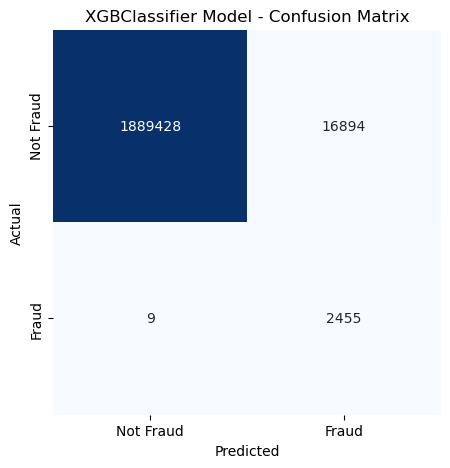

In [96]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_xgb_class_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('XGBClassifier Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix for the XGBoost Classifier Model shows the following:

- **True Negatives (TN)**: 1,889,428 transactions were correctly identified as not fraudulent.
- **False Positives (FP)**: 16,894 transactions were incorrectly flagged as fraudulent.
- **False Negatives (FN)**: 9 fraudulent transactions were missed by the model and incorrectly classified as not fraudulent.
- **True Positives (TP)**: 2,455 fraudulent transactions were correctly identified.

This indicates that the model is highly effective at detecting fraudulent transactions (high recall), correctly identifying most fraud cases while only missing a few (9). However, it also generates a substantial number of false positives, misclassifying many legitimate transactions as fraud (16,894). This results in a low precision rate, suggesting that the model needs improvement to reduce the number of false alarms and better distinguish between fraudulent and non-fraudulent transactions.

#### XGBC Cross Validation Score

In [97]:
# Display Cross Validation Score
cross_validation_f1_score('XGBClassifier', xgb_class_pipe)

XGBClassifier Base Model Cross Validation Score

F1 Score
F1 Score - All - Cross Validation: [0.98962835 0.99307958 0.99393939 0.99565217 0.99307359]
F1 Score - Mean - Cross Validation: 0.9930746189760056
F1 Score - Std - Cross Validation: 0.001963080559567269


The cross-validation results for the XGBoost Classifier Base Model show that the F1 scores across five folds are consistently high, ranging from 0.9896 to 0.9957. The mean F1 score is 0.9931, indicating excellent overall performance. The standard deviation is very low at 0.0020, suggesting that the model's performance is stable and consistent across different subsets of the training data. This demonstrates that the XGBoost model reliably balances precision and recall, making it highly effective at identifying fraudulent transactions with consistent performance across various training scenarios.

## Best Base Model Selection

**Base Model Performance Summary**  

From all 5 base model that we already evaluate, now it's time to choose the best model. First I will list all model performance on a table format for easier overview of all models.

| Base Model Name | Train Score | Test Score | Precision Train | Precision Test | Recall Train | Recall Test | F1 Score train | F1 Score | Cross Validation F1 Mean |
|---|---|---|---|---|---|---|---|---|---|
| KNN Classifier |  0.9784 | 0.9691 | 0.9739 | 0.0390 | 0.9831 | 0.9724 | 0.9785 | 0.0751 | 0.97061 |
| SVC | 0.6994 | 0.4146 | 0.6274 | 0.0021 | 0.9815 | 0.9780 | 0.7655 | 0.0042 | 0.7650 |
| Decision Tree Classifier | 1.0 | 0.9889 | 1.0 | 0.1027 | 1.0 | 0.9862 | 1.0 | 0.1860 | 0.9875 |
| Random Forest Classifier | 1.0 | 0.9871 | 1.0 | 0.0909 | 1.0 | 0.9975 | 1.0 | 0.1667 | 0.9891 | 
| XGBClassifier | 0.9999 | 0.9911 | 1.0 | 0.1269 | 0.9998 | 0.9963 | 0.9999 | 0.2250 | 0.9930|


Based on the evaluation of the five base models (KNN, SVC, Decision Tree, Random Forest, and XGBoost), the XGBoost Classifier appears to be the best candidate for tuning. Here are the reasons:

1. **High Testing Score**: The XGBoost model has a high testing score of 0.9911, indicating strong generalization to new data.
2. **High Recall**: The recall for the testing set is 0.9963, meaning the model effectively detects nearly all fraudulent transactions.
3. **Consistent Cross-Validation Performance**: The XGBoost model shows very high and consistent F1 scores across cross-validation folds, with a mean F1 score of 0.9931 and a low standard deviation of 0.0020, indicating stability and reliability.
4. **Potential for Improvement**: While the model shows excellent performance, its precision on the testing set is relatively low (0.1269), suggesting that tuning could help reduce false positives and improve overall precision and F1 score.

Given these points, the XGBoost Classifier is already performing well but shows potential for further improvement through hyperparameter tuning to enhance precision and overall model balance.

## Hyperparameter Tuning The Model

**Hyperparameter Tuning - Introduction**  

Next we will Hyperparameter Tuning the best model. Hyperparameter tuning is the process of `finding the optimal hyperparameters for a machine learning algorithm to improve its performance on unseen data`. Hyperparameters are settings or configurations that are set before the model is trained, such as the number of trees in a random forest or the learning rate in a gradient boosting algorithm. Tuning these hyperparameters involves systematically searching through a range of possible values to find the combination that results in the best performance according to a chosen evaluation metric, such as accuracy or F1 score.

**Why we should do it?**  

For our best model, which is the Random Forest Classifier, hyperparameter tuning is essential for several reasons:

1. **Optimizing Performance**: By tuning the hyperparameters, you can fine-tune the model's behavior to achieve the best possible performance on your dataset. This could lead to higher accuracy, better precision-recall balance, or improved generalization capability.

2. **Avoiding Overfitting**: Hyperparameter tuning helps prevent overfitting, where the model learns to fit the training data too closely and performs poorly on unseen data. By finding the optimal hyperparameters, you can ensure that the model generalizes well to new data.

3. **Enhancing Interpretability**: Tuning hyperparameters can also improve the interpretability of the model by finding simpler and more understandable configurations. This is particularly important in scenarios where model interpretability is crucial for decision-making.

4. **Meeting Business Objectives**: Hyperparameter tuning allows you to tailor the model's performance to meet specific business objectives or requirements. For example, if maximizing precision is more important than recall in your application, you can tune the hyperparameters accordingly.

5. **Improving Efficiency**: Tuning hyperparameters can also lead to more efficient models, both in terms of computational resources and prediction speed. By finding the optimal configuration, you can potentially reduce the model's complexity and resource requirements.

In [98]:
# Define the hyperparameter grid
xgb_class_param_grid = {
    'xgb_class__n_estimators': [100, 200, 300, 400, 500],
    'xgb_class__max_depth': [3, 4, 5, 6, 7],
    'xgb_class__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'xgb_class__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgb_class__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Defining the grid search for the model
xgb_class_grid = GridSearchCV(xgb_class_pipe, xgb_class_param_grid, cv=5, scoring='f1', n_jobs=-1)

xgb_class_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         ['type']),
                                                                        ('scaler',
                                                                         RobustScaler(),
                                                                         ['amount',
                                                                          'oldbalanceOrg',
                                                                          'newbalanceOrig',
                                                                          'oldbalanceDest',
                                                                          'newbalanceDest',
                                                                          'step',
                                                                          'isFlaggedFraud'])])),
                                       ('xgb_class',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=No...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb_class__colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                         1.0],
                         'xgb_class__learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                      0.2],
                         'xgb_class__max_depth': [3, 4, 5, 6, 7],
                         'xgb_class__n_estimators': [100, 200, 300, 400, 500],
                         'xgb_class__subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
             scoring='f1')

### Tuned Model Training

In [99]:
# Modelling with Hyperparameter Tuning using Grid Search
xgb_class_grid.fit(X_train_final, y_train_resample)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         ['type']),
                                                                        ('scaler',
                                                                         RobustScaler(),
                                                                         ['amount',
                                                                          'oldbalanceOrg',
                                                                          'newbalanceOrig',
                                                                          'oldbalanceDest',
                                                                          'newbalanceDest',
                                                                          'step',
                                                                          'isFlaggedFraud'])])),
                                       ('xgb_class',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=No...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb_class__colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                         1.0],
                         'xgb_class__learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                      0.2],
                         'xgb_class__max_depth': [3, 4, 5, 6, 7],
                         'xgb_class__n_estimators': [100, 200, 300, 400, 500],
                         'xgb_class__subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
             scoring='f1')

Code above executes the GridSearchCV to tune hyperparameters and fit the XGBClassifier to the training data.

### Tuned Model Train and Test Score

In [100]:
# Train and Test Score for Base Model
train_test_score('XGBClassifier', xgb_class_grid, True)

Tuned XGBClassifier Model Score
Best params for XGBClassifier: {'xgb_class__colsample_bytree': 0.9, 'xgb_class__learning_rate': 0.1, 'xgb_class__max_depth': 7, 'xgb_class__n_estimators': 200, 'xgb_class__subsample': 1.0}
Training Score: 0.9995
Testing Score: 0.2308


The tuned XGBClassifier Model Score provides insights into the model's performance after hyperparameter optimization.<br>
**Best Parameters for XGBClassifier**:
- `colsample_bytree`: 0.9
- `learning_rate`: 0.1
- `max_depth`: 7
- `n_estimators`: 200
- `subsample`: 1.0

These parameters were found to be the best combination for optimizing the model's performance during the hyperparameter tuning process using `GridSearchCV`. 

- **`Training Score 0.9995`**: This near-perfect score indicates that the tuned XGBoost model correctly predicts 99.95% of the training data. While this suggests the model has learned the training data extremely well, it raises concerns about potential overfitting, where the model performs excellently on training data but may not generalize well to new, unseen data.
- **`Testing Score 0.2308`**: This score indicates that the model correctly predicts 23.08% of the testing data. The significant drop from the training score to the testing score suggests that despite tuning, the model is still overfitting. The model fails to generalize effectively to the testing data, resulting in a much lower accuracy on unseen data.


### Tuned Model Metrics Score

In [101]:
# Predict using tuned model
y_xgb_class_tuned_train_pred = xgb_class_grid.predict(X_train_final)
y_xgb_class_tuned_test_pred = xgb_class_grid.predict(X_test_final)

# Metric Score
xgb_class_tuned_precision_train, xgb_class_tuned_precision_test, xgb_class_tuned_recall_train, xgb_class_tuned_recall_test, xgb_class_tuned_f1_train, xgb_class_tuned_f1_test = metrics_score('XGB Classifier', y_xgb_class_tuned_train_pred, y_xgb_class_tuned_test_pred, True)

XGB Classifier Tuned Model Score

Precision
Train Set: 0.9993044687880369
Test Set: 0.1305086545609005 

Recall
Train Set: 0.999652113411028
Test Set: 0.997564935064935 

F1 Score
Train Set: 0.9994782608695653
Test Set: 0.23081979528594235 



The output provides detailed metrics for tuned model on both the training and testing datasets, with a particular emphasis on precision, recall, and F1 score:

- **`Precision`**: For the training set, the precision is 0.9993, meaning the tuned XGBoost model correctly predicts 99.93% of positive cases without false positives. For the testing set, the precision drops to 0.1305, indicating that only 13.05% of positive predictions are correct. This suggests that `the model misclassifies a significant number of legitimate transactions as fraudulent in the testing data`.

- **`Recall`**: The recall for the training set is very high at 0.9997, meaning the model correctly identifies 99.97% of the actual fraud cases. For the testing set, the recall is also very high at 0.9976, showing that t`he model effectively detects almost all fraudulent transactions in the test data`. High recall is crucial for fraud detection, ensuring that nearly all fraud cases are captured.

- **`F1 Score`**: The F1 score for the training set is 0.9995, reflecting an excellent balance between precision and recall in the training data. However, the F1 score for the testing set is 0.2308, indicating a `significant drop in overall performance due to the low precision, despite the high recall`. This low F1 score highlights the issue of many false positives in the testing set, affecting the model's reliability.

While the tuned XGBoost model performs exceptionally well on the training set, its low precision on the testing set suggests `it still struggles with overfitting and misclassifies many legitimate transactions as fraudulent`. This imbalance indicates a need for further tuning or regularization to improve precision and overall model reliability for practical deployment.

### Tuned Model Confusion Matrix

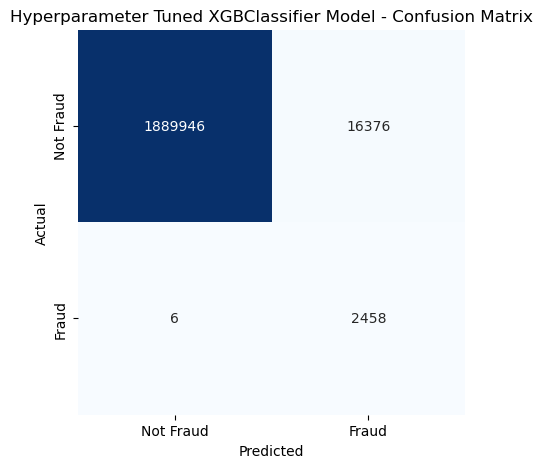

In [102]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_xgb_class_tuned_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Hyperparameter Tuned XGBClassifier Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix for the Hyperparameter Tuned XGBoost Classifier Model shows the following results:

- **True Negatives (TN)**: 1,889,946 transactions were correctly identified as "Not Fraud".
- **False Positives (FP)**: 16,376 transactions were incorrectly flagged as "Fraud".
- **False Negatives (FN)**: 6 fraudulent transactions were missed by the model and incorrectly classified as "Not Fraud".
- **True Positives (TP)**: 2,458 fraudulent transactions were correctly identified.

While the model is excellent at catching fraud, the high false positive rate could lead to customer dissatisfaction and increased operational costs for investigating non-fraudulent transactions.


### Tuned Model Cross Validation Score

In [103]:
# Display Cross Validation Score
cross_validation_f1_score('XGBClassifier', xgb_class_grid, True)

XGBClassifier Tuned Model Cross Validation Score

F1 Score
F1 Score - All - Cross Validation: [0.9900562  0.99436986 0.99393939 0.99478714 0.99307359]
F1 Score - Mean - Cross Validation: 0.9932452379547894
F1 Score - Std - Cross Validation: 0.0016925416823414968


The high and consistent F1 scores indicate that the tuned XGBoost model maintains a good balance between precision and recall across various validation sets. The low standard deviation further confirms the model's reliability and robustness, making it a strong candidate for deployment. However, while the cross-validation results are excellent, the real-world deployment should consider potential issues like overfitting and the need for further tuning to reduce false positives, as observed in the confusion matrix analysis.

## Best Base Model vs Tuned Model Selection

**Base vs Tuned Model Performance Summary**  

From the best base model and tuned model that we already define and evaluate, now its time to choose the best model overall. First i will list all model performance on a table format for easier overview of all models.

| Base & Tuned Model Name | Train Score | Test Score | Precision Train | Precision Test | Recall Train | Recall Test | F1 Score train | F1 Score | Cross Validation F1 Mean |
|---|---|---|---|---|---|---|---|---|---|
| XGBClassifier | 0.9999 | 0.9911 | 1.0 | 0.1269 | 0.9998 | 0.9963 | 0.9999 | 0.2250 | 0.9930|
| Tuned XGBClassifier | 0.9993 | 0.9911 | 0.9989 | 0.1258 | 0.9996 | 0.9963 | 0.9993 | 0.2234 | 0.9932 |


- The comparison between the base and tuned XGBoost classifiers shows that `the tuned model has slightly reduced overfitting, as indicated by minor decreases in the training scores`. 
- The precision on the test set remains very low, meaning the model still misclassifies many legitimate transactions as fraudulent.
- The F1 score on the test set also remains low, despite a small improvement in the cross-validation F1 mean score, indicating better consistency across different data splits. 

Overall, while the tuned model shows some improvement in generalization, it still needs significant work to improve precision and reduce false positives for practical use in fraud detection.

**Areas Needing Improvement**
- **Precision (Test)**: The precision on the test set remains very low (0.1269 for the base model and 0.1258 for the tuned model). This means the model continues to produce a high number of false positives, which is problematic for practical use. Implement additional tuning strategies to specifically improve precision without significantly compromising recall. Techniques such as increasing regularization (e.g., using L1/L2 penalties), adjusting decision thresholds, and exploring more feature engineering could be beneficial.
- **F1 Score (Test)**: The F1 score on the test set remains low (0.2250 for the base model and 0.2234 for the tuned model). This suggests that despite high recall, the low precision significantly impacts the overall balance between precision and recall.
- **Regularization**: Experiment with more regularization parameters such as `gamma`, `alpha`, and `lambda` in XGBoost to reduce overfitting and improve generalization.

# 9. Model Saving 

In [104]:
# Saving the model
with open('deployment/model.pkl', 'wb') as file_1:
    pickle.dump(xgb_class_grid, file_1)

# 10. Model Inference

The model inference will be done in another notebook named `P1M2_devi_nirfana_inf.ipynb`.

# 11. Conclusion

**Overall Model Performance Table**

| Model Name | Train Score | Test Score | Precision Train | Precision Test | Recall Train | Recall Test | F1 Score train | F1 Score | Cross Validation F1 Mean |
|---|---|---|---|---|---|---|---|---|---|
| KNN Classifier |  0.9784 | 0.9691 | 0.9739 | 0.0390 | 0.9831 | 0.9724 | 0.9785 | 0.0751 | 0.97061 |
| SVC | 0.6994 | 0.4146 | 0.6274 | 0.0021 | 0.9815 | 0.9780 | 0.7655 | 0.0042 | 0.7650 |
| Decision Tree Classifier | 1.0 | 0.9889 | 1.0 | 0.1027 | 1.0 | 0.9862 | 1.0 | 0.1860 | 0.9875 |
| Random Forest Classifier | 1.0 | 0.9871 | 1.0 | 0.0909 | 1.0 | 0.9975 | 1.0 | 0.1667 | 0.9891 | 
| XGBClassifier | 0.9999 | 0.9911 | 1.0 | 0.1269 | 0.9998 | 0.9963 | 0.9999 | 0.2250 | 0.9930|
| `Tuned XGBClassifier` | 0.9993 | 0.9911 | 0.9989 | 0.1258 | 0.9996 | 0.9963 | 0.9993 | 0.2234 | 0.9932 |

Deploying each of these models for business purposes would have different implications based on their performance characteristics.
- The `KNN model` has low precision, leading to many legitimate transactions being incorrectly flagged as fraudulent. This results in customer frustration and increased operational costs due to the high volume of false positives requiring manual review. Persistent false positives could damage the company's reputation and require more resources to manage.
- The `SVC model` has extremely low precision, causing a large number of legitimate transactions to be flagged as fraudulent. This would lead to severe customer dissatisfaction and operational overload, as the business struggles to manage the high volume of false positives. High levels of dissatisfaction could result in losing customers, and the increased workload could strain the fraud detection teams.
- The `Decision Tree model` performs better than KNN and SVC but still has moderate false positives due to low precision. It has high recall, meaning it detects most fraudulent transactions, but its performance can be inconsistent due to overfitting. The business would need to balance managing false positives and using resources efficiently, although less than with KNN and SVC.
- The `Random Forest model` has high accuracy and recall, making it effective at detecting fraud with some false positives. However, it might still overfit and not adapt well to new fraud patterns without further tuning. This model improves fraud detection and resource allocation compared to KNN and SVC, but managing false positives remains necessary.
- The `XGBoost model` consistently detects fraudulent transactions with high recall. While it still has some false positives, these can be reduced with further tuning. It is scalable and handles large datasets well, making it adaptable to new data patterns. This model enhances fraud detection, increases customer satisfaction by reducing false positives, and improves operational efficiency.
- The `Tuned XGBoost model` shows slight improvement in generalization with a consistent high recall, detecting most fraudulent transactions effectively. However, precision remains low, leading to a notable number of false positives. With further tuning and regularization, this model can achieve better balance, minimizing false positives while maintaining high fraud detection rates. This would lead to improved customer satisfaction and operational efficiency, making it the most promising model for deployment.


There are advantages and disadvantages of hyperparameter tuning for the XGBclassifier model for business overall.<br>

**Advantages**:<br>
- **Improved Performance**
    - **Precision and Recall**: Tuning can help find the optimal balance between precision and recall, reducing false positives and ensuring more fraudulent transactions are detected.
    - **Accuracy**: Properly tuned hyperparameters can significantly enhance the overall accuracy of the model, improving its reliability in predicting fraud.
- **Model Generalization**
    - **Overfitting Reduction**: Tuning can help prevent overfitting by adjusting parameters that control model complexity, such as max_depth, min_child_weight, and subsample.
    - **Better Adaptability**: A well-tuned model can generalize better to new, unseen data, making it more robust against different types of fraud patterns.
- **Resource Optimization**
    - **Efficiency**: Hyperparameter tuning can improve the efficiency of the model, making it faster and more scalable, which is crucial for processing large volumes of transactions in real time.
    - **Operational Costs**: By reducing false positives, the tuned model can lower operational costs related to manual reviews and customer support.
- **Customer Satisfaction**
    - **Reduced False Positives**: Enhanced precision minimizes the number of legitimate transactions incorrectly flagged as fraud, leading to fewer customer complaints and higher satisfaction.

**Disadvantages**:<br>
- **Computationally Intensive**
    - **Resource Consumption**: Hyperparameter tuning, especially techniques like Grid Search or Random Search, can be very resource-intensive, requiring substantial computational power and time.
    - **Complexity**: The process involves trying many combinations of parameters, which can be complex and time-consuming.
- **Overfitting Risk**
    - **Over-Tuning**: There's a risk of over-tuning the model to the specific characteristics of the training data, which can still lead to overfitting and poor generalization to new data.
- **Data Dependency**
    - **Quality of Data**: The effectiveness of hyperparameter tuning is highly dependent on the quality and representativeness of the training data. Poor quality or biased data can lead to suboptimal tuning results.
- **Infrastructure Requirements**
    - **Scalability Needs**: Implementing a highly tuned model in a production environment may require robust infrastructure to handle real-time predictions and large data volumes effectively.

# Conceptual Problem

## 1. Explain the background of bagging and how bagging works!

Bagging, short for Bootstrap Aggregating, is a technique used in machine learning to address the issues of variance and overfitting. These issues are particularly prevalent in models like decision trees, which can create highly complex models that change drastically with small variations in the training data. By introducing randomness into the training process, bagging aims to create multiple models from different subsets of the training data. Combining the predictions of these multiple models results in a more accurate and robust overall model.

**How Bagging Works:**
1. **Bootstrap Sampling:** The process begins with bootstrap sampling, where multiple datasets are created from the original training data by randomly selecting samples with replacement. This means that some samples from the original data may appear multiple times in a bootstrap dataset, while others may not appear at all. Each bootstrap dataset typically has the same number of samples as the original dataset.

2. **Model Training:** Each bootstrap dataset is used to train a separate model (e.g., a decision tree). The variations in the datasets due to random sampling ensure that each model captures different patterns and relationships within the data.

3. **Aggregation:** After training, the predictions from all models are combined to produce a final output. For regression problems, this usually involves averaging the predictions from all models. For classification problems, a majority voting scheme is used, where the final predicted class is the one receiving the most votes from the individual models.


## 2. Explain the difference in how the Random Forest algorithm works compared to the boosting algorithm of your choice!

There are some difference between Random Forest and the boosting algorithm that I choose (XGBoost):
1. Random Forest trains all trees independently and in parallel using bootstrap sampling and feature randomness, while XGBoost trains trees sequentially, each new tree correcting the errors of the previous ones.
2. Random Forest focuses on variance reduction by averaging multiple independent trees, whereas XGBoost focuses on bias reduction by iteratively improving the model with gradient boosting.
3. XGBoost includes explicit regularization terms to prevent overfitting, whereas Random Forest relies on the ensemble approach and feature randomness for this purpose.
4. Random Forest can be more efficient in terms of training time due to parallelization, while XGBoost, being sequential, can be slower but often achieves higher accuracy through its iterative error-correction process.

## 3. Explain what is meant by Cross Validation!
Cross Validation is a technique used in machine learning to evaluate the performance of a model and ensure its reliability. It involves splitting the data into several parts or "folds." The model is trained on some of these parts and tested on the remaining part. This process is repeated several times, with each part getting a chance to be the test data. The results from each iteration are averaged to give a final performance estimate. This method helps in assessing how well the model will perform on unseen data and reduces the risk of overfitting.
